# Training Model - Robust Scaler

# Import Library

In [1]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#import library untuk data splitting
from sklearn.model_selection import train_test_split

#Import library untuk scalling data
from sklearn.preprocessing import StandardScaler

#Import library untuk kalkulasi mean absolute error atau MAE
from sklearn.metrics import mean_absolute_error

#Import library untuk pembuatan mode dengan decisiontree
from sklearn.tree import DecisionTreeRegressor

#Import library untuk melakukan cross validation dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

#Import library untuk pembuatan mode dengan BaggingRegressor
from sklearn.ensemble import BaggingRegressor

#Import library untuk pembuatan mode dengan RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Import library untuk pembuatan mode dengan AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

#Import library untuk pembuatan mode dengan GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Import library untuk pembuatan mode dengan XGBRegressor
from xgboost.sklearn import XGBRegressor
from xgboost import XGBRegressor

#Import library untuk pembuatan mode dengan KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

#Import fungsi untuk imputasi handling missing value
from sklearn.impute import SimpleImputer

#Import library untuk pembuatan mode dengan LinearRegression
from sklearn.linear_model import LinearRegression

#Import library untuk pembuatan mode dengan ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
import src.util as util

In [2]:
params_dir = "config/config.yaml"

In [3]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [4]:
params = load_params(params_dir)

In [5]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'robust_scaler_train': ['dataset/3 - final/X_train_robust.pkl',
  'dataset/3 - final/y_train.pkl'],
 'robust_scaler_valid': ['dataset/3 - final/X_valid_robust.pkl',
  'dataset/3 - final/y_valid.pkl'],
 'robust_scaler_test': ['dataset/3 - final/X_test_robust.pkl',
  'dataset/3 - final/y_test.pkl'],
 'production_model_path': 'model/5 - Model Final',
 'model_robust_scaler': 'model/5 - Model Final/robust_scaler.pkl',
 'robust_scaler': 'model/5 - Model Final/',
 'model_final': 'model/5 - Model Final/xgboost_cv_robust.pkl',
 'print_debug': True,
 'int64_columns': ['Year', 'Kms_Driven', 'Owner'],
 'float64_columns': ['Present_Price'],
 'object_columns': ['Fuel_Type

In [6]:
config_data = util.load_config()

## Read Data

In [7]:
#Read data X_train dan y_sm hasil dari data preparation
X_train = util.pickle_load(config_data["robust_scaler_train"][0])
y_train = util.pickle_load(config_data["robust_scaler_train"][1])

In [8]:
#Read data X_valid dan y_valid hasil dari data preparation
X_valid = util.pickle_load(config_data["robust_scaler_valid"][0])
y_valid = util.pickle_load(config_data["robust_scaler_valid"][1])

In [9]:
#Read data X_test dan y_test hasil dari data preparation
X_test = util.pickle_load(config_data["robust_scaler_test"][0])
y_test = util.pickle_load(config_data["robust_scaler_test"][1])

In [10]:
X_train

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Kms_Driven,Owner,Present_Price,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Year
5,0,1,0,-0.859354,0.0,0.434483,1,0,0,1,1.00
258,0,0,1,-0.153846,0.0,0.867816,1,0,0,1,0.25
278,0,0,1,-0.800000,0.0,0.270115,1,0,0,1,0.50
260,0,0,1,-0.023908,0.0,0.867816,1,0,0,1,0.50
7,0,1,0,0.105508,0.0,0.294253,1,0,0,1,0.25
...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,1,-0.415385,1.0,-0.298851,0,1,0,1,0.00
83,0,1,0,0.246154,0.0,0.851724,1,0,0,1,0.25
17,0,1,0,0.400000,0.0,0.544828,1,0,0,1,0.50
230,0,1,0,0.461538,0.0,0.385057,1,0,0,1,-0.25


In [11]:
y_train

5       9.25
258     8.40
278     6.00
260     9.15
7       6.50
       ...  
106     1.35
83     12.50
17      7.75
230     6.15
98      7.05
Name: Selling_Price, Length: 225, dtype: float64

In [12]:
X_valid

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Kms_Driven,Owner,Present_Price,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Year
20,0,0,1,-0.153846,0.0,-0.241379,1,0,0,1,0.50
105,0,0,1,-0.255385,0.0,-0.422989,0,1,0,1,0.25
174,0,0,1,0.264615,0.0,-0.612644,0,1,0,1,0.25
294,0,0,1,0.092892,0.0,0.086207,1,0,0,1,0.00
293,0,0,1,0.246154,0.0,0.442529,1,0,0,1,-1.00
160,0,0,1,-0.184615,0.0,-0.586207,0,1,0,1,-0.75
19,0,0,1,0.352062,0.0,0.221839,1,0,0,1,-1.00
102,0,0,1,-0.800000,0.0,-0.490805,0,1,0,1,0.75
241,0,0,1,0.180492,1.0,0.124138,1,0,0,1,0.25
210,0,0,1,0.177692,0.0,-0.166667,1,0,0,1,-0.50


In [13]:
y_valid

20      2.85
105     1.35
174     0.38
294     3.75
293     3.25
160     0.45
19      2.65
102     1.65
241     4.75
210     3.10
207     5.15
169     0.40
95      5.85
29      7.45
107     1.25
53     16.00
36      4.65
42      1.95
252     5.40
114     1.15
194     0.20
292     6.40
192     0.20
127     0.75
30      3.10
143     0.60
31      2.35
151     0.50
94      4.00
61      4.50
11      6.85
Name: Selling_Price, dtype: float64

In [14]:
X_test

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Kms_Driven,Owner,Present_Price,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Year
256,0,0,1,0.601908,0.0,0.867816,1,0,0,1,0.50
26,0,0,1,0.773477,0.0,-0.020690,1,0,0,1,-0.25
215,0,0,1,0.187692,0.0,0.385057,1,0,0,1,-0.50
150,0,0,1,-0.738462,0.0,-0.600460,0,1,0,1,-0.75
148,0,0,1,0.461538,0.0,-0.587356,0,1,0,1,-1.00
268,0,0,1,-0.338462,0.0,-0.028736,1,0,0,1,0.75
82,0,1,0,-0.461538,0.0,2.222989,1,0,1,0,0.75
195,0,0,1,0.153846,0.0,-0.658621,0,1,0,1,0.25
24,0,0,1,0.827046,0.0,-0.188506,1,0,0,1,-0.25
218,0,0,1,0.463938,0.0,0.385057,1,0,0,1,0.00


In [15]:
y_test

256    10.25
26      4.15
215     4.50
150     0.50
148     0.52
268     4.80
82     23.00
195     0.18
24      2.90
218     6.45
204     2.75
170     0.40
138     0.60
279     6.25
71      4.50
52     18.00
282     8.25
297     4.00
266     3.65
267     8.35
124     0.95
144     0.60
35      2.95
250    12.90
80     14.73
22      4.40
54      2.75
173     0.40
72      7.45
81      4.75
21      4.90
259     3.90
136     0.65
41      2.55
166     0.45
290     4.50
235     9.10
89      4.75
137     0.65
289    10.11
249     5.25
286     5.65
179     0.31
75      3.95
222     6.00
Name: Selling_Price, dtype: float64

## Baseline Model

In [31]:
#Prediksi dengan Baseline Model berbasiskan rata-rata
y_baseline_predict = y_train.mean()
y_baseline_predict

4.762533333333334

In [32]:
# Melihat R-squared (R2) pada baseline Model
r2_train_baseline = r2_score(y_train, y_baseline_predict * np.ones(len(y_train)))
r2_test_baseline = r2_score(y_test, y_baseline_predict * np.ones(len(y_test)))
r2_valid_baseline = r2_score(y_valid, y_baseline_predict * np.ones(len(y_valid)))

# Melihat Mean Squared Error (MSE) pada baseline Model
mse_train_baseline = mean_squared_error(y_train, y_baseline_predict * np.ones(len(y_train)))
mse_test_baseline = mean_squared_error(y_test, y_baseline_predict * np.ones(len(y_test)))
mse_valid_baseline = mean_squared_error(y_valid, y_baseline_predict * np.ones(len(y_valid)))

# Melihat Root Mean Square Error (RMSE) pada baseline Model
rmse_train_baseline = np.sqrt(mse_train_baseline)
rmse_test_baseline = np.sqrt(mse_test_baseline)
rmse_valid_baseline = np.sqrt(mse_valid_baseline)

# Melihat Mean Absolute Error (MAE) pada baseline Model
mae_train_baseline = mean_absolute_error(y_train, y_baseline_predict * np.ones(len(y_train)))
mae_test_baseline = mean_absolute_error(y_test, y_baseline_predict * np.ones(len(y_test)))
mae_valid_baseline = mean_absolute_error(y_valid, y_baseline_predict * np.ones(len(y_valid)))

# Menampilkan semua metrik evaluasi
print("MAE (Mean Absolute Error) Train: ", mae_train_baseline)
print("MAE (Mean Absolute Error) Test: ", mae_test_baseline)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_baseline)

print("R2 (R-squared) Train: ", r2_train_baseline)
print("R2 (R-squared) Test: ", r2_test_baseline)
print("R2 (R-squared) Valid: ", r2_test_baseline)

print("MSE (Mean Squared Error) Train: ", mse_train_baseline)
print("MSE (Mean Squared Error) Test: ", mse_test_baseline)
print("MSE (Mean Squared Error) Valid: ", mse_valid_baseline)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_baseline)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_baseline)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_baseline)

MAE (Mean Absolute Error) Train:  3.5991063703703707
MAE (Mean Absolute Error) Test:  3.0388280701754384
MAE (Mean Absolute Error) Valid:  2.7188086021505375
R2 (R-squared) Train:  0.0
R2 (R-squared) Test:  -0.008793921977042318
R2 (R-squared) Valid:  -0.008793921977042318
MSE (Mean Squared Error) Train:  28.231018915555556
MSE (Mean Squared Error) Test:  18.442075084444447
MSE (Mean Squared Error) Valid:  11.949160568315412
RMSE (Root Mean Squared Error) Train:  5.31328701610929
RMSE (Root Mean Squared Error) Test:  4.294423719714258
RMSE (Root Mean Squared Error) Valid:  3.4567557866177663


## Linear Regression

In [59]:
#Build LinearRegression
lin_reg = LinearRegression()

In [60]:
#Fitting Model LinearRegression
lin_reg.fit(X_train, y_train)

LinearRegression()

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_valid = lin_reg.predict(X_valid)

# MAE
mae_train_lg = mean_absolute_error(y_train, y_pred_train)
mae_test_lg = mean_absolute_error(y_test, y_pred_test)
mae_valid_lg = mean_absolute_error(y_valid, y_pred_valid)

# R2
r2_train_lg = r2_score(y_train, y_pred_train)
r2_test_lg = r2_score(y_test, y_pred_test)
r2_valid_lg = r2_score(y_valid, y_pred_valid)

# MSE
mse_train_lg = mean_squared_error(y_train, y_pred_train)
mse_test_lg = mean_squared_error(y_test, y_pred_test)
mse_valid_lg = mean_squared_error(y_valid, y_pred_valid)

# RMSE
rmse_train_lg = np.sqrt(mse_train_lg)
rmse_test_lg = np.sqrt(mse_test_lg)
rmse_valid_lg = np.sqrt(mse_valid_lg)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_lg)
print("MAE (Mean Absolute Error) Test: ", mae_test_lg)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_lg)

print("R2 (R-squared) Train: ", r2_train_lg)
print("R2 (R-squared) Test: ", r2_test_lg)
print("R2 (R-squared) Valid: ", r2_valid_lg)

print("MSE (Mean Squared Error) Train: ", mse_train_lg)
print("MSE (Mean Squared Error) Test: ", mse_test_lg)
print("MSE (Mean Squared Error) Valid: ", mse_valid_lg)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_lg)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_lg)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_lg)

MAE (Mean Absolute Error) Train:  1.1823541666666668
MAE (Mean Absolute Error) Test:  1.2181458333333335
MAE (Mean Absolute Error) Valid:  1.0326512096774194
R2 (R-squared) Train:  0.8896625714170104
R2 (R-squared) Test:  0.8667794358974458
R2 (R-squared) Valid:  0.7499556980153697
MSE (Mean Squared Error) Train:  3.114938033420139
MSE (Mean Squared Error) Test:  3.039318817274305
MSE (Mean Squared Error) Valid:  2.466570473160283
RMSE (Root Mean Squared Error) Train:  1.764918704479087
RMSE (Root Mean Squared Error) Test:  1.7433642239286387
RMSE (Root Mean Squared Error) Valid:  1.5705319077179816


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Membangun objek GridSearchCV dengan LinearRegression dan parameter grid
grid_search_lg = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='r2')

# Melatih model dengan Grid Search
grid_search_lg.fit(X_train, y_train)

# Menampilkan skor rata-rata dari masing-masing cross-validation
print("R2 Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(grid_search_lg.cv_results_['mean_test_score']):
    print(f"CV-{i + 1}: {score:.4f}")

# Menampilkan parameter terbaik
print("\nParameter Terbaik:")
print(grid_search_lg.best_params_)


R2 Score Rata-rata Setiap Cross-Validation:
CV-1: 0.8346
CV-2: 0.7735
CV-3: 0.8346
CV-4: 0.7737

Parameter Terbaik:
{'fit_intercept': True, 'positive': True}


In [63]:
# Mendapatkan model terbaik
best_model_lgcv = grid_search_lg.best_estimator_

# Melakukan refit model terbaik ke data pelatihan
best_model_lgcv.fit(X_train, y_train)

# Mengevaluasi model terbaik pada data pengujian
y_pred = best_model_lgcv.predict(X_test)

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict
y_pred_train = best_model_lgcv.predict(X_train)
y_pred_test = best_model_lgcv.predict(X_test)
y_pred_valid = best_model_lgcv.predict(X_valid)

# MAE
mae_train_lgcv = mean_absolute_error(y_train, y_pred_train)
mae_test_lgcv = mean_absolute_error(y_test, y_pred_test)
mae_valid_lgcv = mean_absolute_error(y_valid, y_pred_valid)

# R2
r2_train_lgcv = r2_score(y_train, y_pred_train)
r2_test_lgcv = r2_score(y_test, y_pred_test)
r2_valid_lgcv = r2_score(y_valid, y_pred_valid)

# MSE
mse_train_lgcv = mean_squared_error(y_train, y_pred_train)
mse_test_lgcv = mean_squared_error(y_test, y_pred_test)
mse_valid_lgcv = mean_squared_error(y_valid, y_pred_valid)

# RMSE
rmse_train_lgcv = np.sqrt(mse_train_lgcv)
rmse_test_lgcv = np.sqrt(mse_test_lgcv)
rmse_valid_lgcv = np.sqrt(mse_valid_lgcv)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_lgcv)
print("MAE (Mean Absolute Error) Test: ", mae_test_lgcv)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_lgcv)

print("R2 (R-squared) Train: ", r2_train_lgcv)
print("R2 (R-squared) Test: ", r2_test_lgcv)
print("R2 (R-squared) Valid: ", r2_valid_lgcv)

print("MSE (Mean Squared Error) Train: ", mse_train_lgcv)
print("MSE (Mean Squared Error) Test: ", mse_test_lgcv)
print("MSE (Mean Squared Error) Valid: ", mse_valid_lgcv)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_lgcv)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_lgcv)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_lgcv)

MAE (Mean Absolute Error) Train:  1.1930399776306195
MAE (Mean Absolute Error) Test:  1.2541509325814477
MAE (Mean Absolute Error) Valid:  1.020351251543111
R2 (R-squared) Train:  0.8859492014008953
R2 (R-squared) Test:  0.864487995468508
R2 (R-squared) Valid:  0.7599137481684168
MSE (Mean Squared Error) Train:  3.2197702525855414
MSE (Mean Squared Error) Test:  3.091596166955638
MSE (Mean Squared Error) Valid:  2.368338950654862
RMSE (Root Mean Squared Error) Train:  1.7943718267364603
RMSE (Root Mean Squared Error) Test:  1.7582935383364287
RMSE (Root Mean Squared Error) Valid:  1.5389408535271465


## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Build Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Fitting Model Decision Tree Regressor
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [66]:
# Predict
y_pred_train_dt = dt_reg.predict(X_train)
y_pred_test_dt = dt_reg.predict(X_test)
y_pred_valid_dt = dt_reg.predict(X_valid)

# MAE
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)
mae_valid_dt = mean_absolute_error(y_valid, y_pred_valid_dt)

# R2
r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)
r2_valid_dt = r2_score(y_valid, y_pred_valid_dt)

# MSE
mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
mse_valid_dt = mean_squared_error(y_valid, y_pred_valid_dt)

# RMSE
rmse_train_dt = np.sqrt(mse_train_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
rmse_valid_dt = np.sqrt(mse_valid_dt)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_dt)
print("MAE (Mean Absolute Error) Test: ", mae_test_dt)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_dt)

print("R2 (R-squared) Train: ", r2_train_dt)
print("R2 (R-squared) Test: ", r2_test_dt)
print("R2 (R-squared) Valid: ", r2_valid_dt)

print("MSE (Mean Squared Error) Train: ", mse_train_dt)
print("MSE (Mean Squared Error) Test: ", mse_test_dt)
print("MSE (Mean Squared Error) Valid: ", mse_valid_dt)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_dt)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_dt)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_dt)

MAE (Mean Absolute Error) Train:  0.0
MAE (Mean Absolute Error) Test:  0.754222222222222
MAE (Mean Absolute Error) Valid:  0.4974193548387097
R2 (R-squared) Train:  1.0
R2 (R-squared) Test:  0.9402899794124202
R2 (R-squared) Valid:  0.9485043434910189
MSE (Mean Squared Error) Train:  0.0
MSE (Mean Squared Error) Test:  1.3622355555555556
MSE (Mean Squared Error) Valid:  0.5079806451612903
RMSE (Root Mean Squared Error) Train:  0.0
RMSE (Root Mean Squared Error) Test:  1.167148471941576
RMSE (Root Mean Squared Error) Valid:  0.7127276093721151


In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Membangun objek Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Membangun objek GridSearchCV dengan DecisionTreeRegressor dan parameter grid
grid_search_dt = GridSearchCV(dt_reg, param_grid, cv=5, scoring='r2', refit=True)

# Melatih model dengan Grid Search
grid_search_dt.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_dt_model = grid_search_dt.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_dt.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_dt_model.fit(X_train, y_train)

Parameter Terbaik:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=10, random_state=42)

In [68]:
# Predict
y_pred_train_dt = best_dt_model.predict(X_train)
y_pred_test_dt = best_dt_model.predict(X_test)
y_pred_valid_dt = best_dt_model.predict(X_valid)

# MAE
mae_train_cvdt = mean_absolute_error(y_train, y_pred_train_dt)
mae_test_cvdt = mean_absolute_error(y_test, y_pred_test_dt)
mae_valid_cvdt = mean_absolute_error(y_valid, y_pred_valid_dt)

# R2
r2_train_cvdt = r2_score(y_train, y_pred_train_dt)
r2_test_cvdt = r2_score(y_test, y_pred_test_dt)
r2_valid_cvdt = r2_score(y_valid, y_pred_valid_dt)

# MSE
mse_train_cvdt = mean_squared_error(y_train, y_pred_train_dt)
mse_test_cvdt = mean_squared_error(y_test, y_pred_test_dt)
mse_valid_cvdt = mean_squared_error(y_valid, y_pred_valid_dt)

# RMSE
rmse_train_cvdt = np.sqrt(mse_train_cvdt)
rmse_test_cvdt = np.sqrt(mse_test_cvdt)
rmse_valid_cvdt = np.sqrt(mse_valid_cvdt)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvdt)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvdt)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvdt)

print("R2 (R-squared) Train: ", r2_train_cvdt)
print("R2 (R-squared) Test: ", r2_test_cvdt)
print("R2 (R-squared) Valid: ", r2_valid_cvdt)

print("MSE (Mean Squared Error) Train: ", mse_train_cvdt)
print("MSE (Mean Squared Error) Test: ", mse_test_cvdt)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvdt)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvdt)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvdt)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvdt)

MAE (Mean Absolute Error) Train:  0.035283597883597896
MAE (Mean Absolute Error) Test:  0.7236878306878307
MAE (Mean Absolute Error) Valid:  0.44066052227342545
R2 (R-squared) Train:  0.9994864113010408
R2 (R-squared) Test:  0.9495354122297347
R2 (R-squared) Valid:  0.952929375579307
MSE (Mean Squared Error) Train:  0.014499132275132276
MSE (Mean Squared Error) Test:  1.1513085254472162
MSE (Mean Squared Error) Valid:  0.4643297664764829
RMSE (Root Mean Squared Error) Train:  0.12041234270261615
RMSE (Root Mean Squared Error) Test:  1.0729904591594541
RMSE (Root Mean Squared Error) Valid:  0.6814174685730348


In [69]:
# Mendapatkan skor R2 untuk setiap CV
cv_r2_scores = grid_search_dt.cv_results_['mean_test_score']

# Menampilkan skor R2 rata-rata antar CV
print("R2 Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_r2_scores):
    print(f"CV-{i + 1}: {score:.4f}")

R2 Score Rata-rata Setiap Cross-Validation:
CV-1: 0.7592
CV-2: 0.7756
CV-3: 0.6841
CV-4: 0.7368
CV-5: 0.7460
CV-6: 0.6790
CV-7: 0.6994
CV-8: 0.6994
CV-9: 0.6796
CV-10: 0.7873
CV-11: 0.7617
CV-12: 0.6841
CV-13: 0.7404
CV-14: 0.7461
CV-15: 0.6790
CV-16: 0.6994
CV-17: 0.6994
CV-18: 0.6796
CV-19: 0.7592
CV-20: 0.7756
CV-21: 0.6841
CV-22: 0.7368
CV-23: 0.7460
CV-24: 0.6790
CV-25: 0.6994
CV-26: 0.6994
CV-27: 0.6796
CV-28: 0.7592
CV-29: 0.7756
CV-30: 0.6841
CV-31: 0.7368
CV-32: 0.7460
CV-33: 0.6790
CV-34: 0.6994
CV-35: 0.6994
CV-36: 0.6796


## Extratrees Regression

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Build ExtraTrees Regressor
et_reg = ExtraTreesRegressor(random_state=42)

# Fitting Model ExtraTrees Regressor
et_reg.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [71]:
# Predict
y_pred_train_et = et_reg.predict(X_train)
y_pred_test_et = et_reg.predict(X_test)
y_pred_valid_et = et_reg.predict(X_valid)

# MAE
mae_train_et = mean_absolute_error(y_train, y_pred_train_et)
mae_test_et = mean_absolute_error(y_test, y_pred_test_et)
mae_valid_et = mean_absolute_error(y_valid, y_pred_valid_et)

# R2
r2_train_et = r2_score(y_train, y_pred_train_et)
r2_test_et = r2_score(y_test, y_pred_test_et)
r2_valid_et = r2_score(y_valid, y_pred_valid_et)

# MSE
mse_train_et = mean_squared_error(y_train, y_pred_train_et)
mse_test_et = mean_squared_error(y_test, y_pred_test_et)
mse_valid_et = mean_squared_error(y_valid, y_pred_valid_et)

# RMSE
rmse_train_et = np.sqrt(mse_train_et)
rmse_test_et = np.sqrt(mse_test_et)
rmse_valid_et = np.sqrt(mse_valid_et)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_et)
print("MAE (Mean Absolute Error) Test: ", mae_test_et)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_et)

print("R2 (R-squared) Train: ", r2_train_et)
print("R2 (R-squared) Test: ", r2_test_et)
print("R2 (R-squared) Valid: ", r2_valid_et)

print("MSE (Mean Squared Error) Train: ", mse_train_et)
print("MSE (Mean Squared Error) Test: ", mse_test_et)
print("MSE (Mean Squared Error) Valid: ", mse_valid_et)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_et)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_et)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_et)

MAE (Mean Absolute Error) Train:  2.5515392268163043e-15
MAE (Mean Absolute Error) Test:  0.8561488888888898
MAE (Mean Absolute Error) Valid:  0.5134967741935486
R2 (R-squared) Train:  1.0
R2 (R-squared) Test:  0.8929784247988385
R2 (R-squared) Valid:  0.7303175620352163
MSE (Mean Squared Error) Train:  2.5088611754906314e-29
MSE (Mean Squared Error) Test:  2.4416101940000035
MSE (Mean Squared Error) Valid:  2.660291529677421
RMSE (Root Mean Squared Error) Train:  5.0088533373324396e-15
RMSE (Root Mean Squared Error) Test:  1.5625652607171334
RMSE (Root Mean Squared Error) Valid:  1.6310400147382715


In [72]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Membangun objek Extra Trees Regressor
et_reg = ExtraTreesRegressor(random_state=42)

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Membangun objek GridSearchCV dengan ExtraTreesRegressor dan parameter grid
grid_search_et = GridSearchCV(et_reg, param_grid, cv=5, scoring='r2', refit=True)

# Melatih model dengan Grid Search
grid_search_et.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_et_model = grid_search_et.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_et.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_et_model.fit(X_train, y_train)

Parameter Terbaik:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


ExtraTreesRegressor(max_depth=10, random_state=42)

In [73]:
# Predict
y_pred_train_et = best_et_model.predict(X_train)
y_pred_test_et = best_et_model.predict(X_test)
y_pred_valid_et = best_et_model.predict(X_valid)

# MAE
mae_train_cvet = mean_absolute_error(y_train, y_pred_train_et)
mae_test_cvet = mean_absolute_error(y_test, y_pred_test_et)
mae_valid_cvet = mean_absolute_error(y_valid, y_pred_valid_et)

# R2
r2_train_cvet = r2_score(y_train, y_pred_train_et)
r2_test_cvet = r2_score(y_test, y_pred_test_et)
r2_valid_cvet = r2_score(y_valid, y_pred_valid_et)

# MSE
mse_train_cvet = mean_squared_error(y_train, y_pred_train_et)
mse_test_cvet = mean_squared_error(y_test, y_pred_test_et)
mse_valid_cvet = mean_squared_error(y_valid, y_pred_valid_et)

# RMSE
rmse_train_cvet = np.sqrt(mse_train_cvet)
rmse_test_cvet = np.sqrt(mse_test_cvet)
rmse_valid_cvet = np.sqrt(mse_valid_cvet)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvet)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvet)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvet)

print("R2 (R-squared) Train: ", r2_train_cvet)
print("R2 (R-squared) Test: ", r2_test_cvet)
print("R2 (R-squared) Valid: ", r2_valid_cvet)

print("MSE (Mean Squared Error) Train: ", mse_train_cvet)
print("MSE (Mean Squared Error) Test: ", mse_test_cvet)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvet)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvet)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvet)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvet)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores = grid_search_et.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores):
    print(f"CV-{i + 1}: {score:.4f}")

MAE (Mean Absolute Error) Train:  0.11780513845816756
MAE (Mean Absolute Error) Test:  0.8034222712787139
MAE (Mean Absolute Error) Valid:  0.49899973164837336
R2 (R-squared) Train:  0.9984811946649964
R2 (R-squared) Test:  0.9145753484802565
R2 (R-squared) Valid:  0.744530605755229
MSE (Mean Squared Error) Train:  0.042877422141534255
MSE (Mean Squared Error) Test:  1.9488939457063794
MSE (Mean Squared Error) Valid:  2.520086479231303
RMSE (Root Mean Squared Error) Train:  0.2070686411350938
RMSE (Root Mean Squared Error) Test:  1.3960279172374668
RMSE (Root Mean Squared Error) Valid:  1.5874780248026437
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 0.8861
CV-2: 0.8872
CV-3: 0.8876
CV-4: 0.8871
CV-5: 0.8858
CV-6: 0.8853
CV-7: 0.8391
CV-8: 0.8384
CV-9: 0.8425
CV-10: 0.8555
CV-11: 0.8549
CV-12: 0.8523
CV-13: 0.8465
CV-14: 0.8537
CV-15: 0.8514
CV-16: 0.8137
CV-17: 0.8241
CV-18: 0.8275
CV-19: 0.8300
CV-20: 0.8331
CV-21: 0.8363
CV-22: 0.8300
CV-23: 0.8331
CV-24: 0.8363
CV-25: 0.8247
C

## BaggingRegressor

In [74]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Build Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Build Bagging Regressor using Decision Tree Regressor as the base estimator
bagging_reg = BaggingRegressor(base_estimator=dt_reg, random_state=42)

# Fitting Model Bagging Regressor
bagging_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                 random_state=42)

In [75]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Build Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Build Bagging Regressor using Decision Tree Regressor as the base estimator
bagging_reg = BaggingRegressor(base_estimator=dt_reg, random_state=42)

# Fitting Model Bagging Regressor
bagging_reg.fit(X_train, y_train)

# Predict
y_pred_train_bagging = bagging_reg.predict(X_train)
y_pred_test_bagging = bagging_reg.predict(X_test)
y_pred_valid_bagging = bagging_reg.predict(X_valid)

# MAE
mae_train_bagging = mean_absolute_error(y_train, y_pred_train_bagging)
mae_test_bagging = mean_absolute_error(y_test, y_pred_test_bagging)
mae_valid_bagging = mean_absolute_error(y_valid, y_pred_valid_bagging)

# R2
r2_train_bagging = r2_score(y_train, y_pred_train_bagging)
r2_test_bagging = r2_score(y_test, y_pred_test_bagging)
r2_valid_bagging = r2_score(y_valid, y_pred_valid_bagging)

# MSE
mse_train_bagging = mean_squared_error(y_train, y_pred_train_bagging)
mse_test_bagging = mean_squared_error(y_test, y_pred_test_bagging)
mse_valid_bagging = mean_squared_error(y_valid, y_pred_valid_bagging)

# RMSE
rmse_train_bagging = np.sqrt(mse_train_bagging)
rmse_test_bagging = np.sqrt(mse_test_bagging)
rmse_valid_bagging = np.sqrt(mse_valid_bagging)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_bagging)
print("MAE (Mean Absolute Error) Test: ", mae_test_bagging)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_bagging)

print("R2 (R-squared) Train: ", r2_train_bagging)
print("R2 (R-squared) Test: ", r2_test_bagging)
print("R2 (R-squared) Valid: ", r2_valid_bagging)

print("MSE (Mean Squared Error) Train: ", mse_train_bagging)
print("MSE (Mean Squared Error) Test: ", mse_test_bagging)
print("MSE (Mean Squared Error) Valid: ", mse_valid_bagging)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_bagging)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_bagging)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_bagging)

MAE (Mean Absolute Error) Train:  0.3346755555555555
MAE (Mean Absolute Error) Test:  0.6591333333333332
MAE (Mean Absolute Error) Valid:  0.38458064516129037
R2 (R-squared) Train:  0.9755182021646073
R2 (R-squared) Test:  0.9465428733232656
R2 (R-squared) Valid:  0.9706308440342256
MSE (Mean Squared Error) Train:  0.6911460977777779
MSE (Mean Squared Error) Test:  1.219580866666666
MSE (Mean Squared Error) Valid:  0.28971303225806433
RMSE (Root Mean Squared Error) Train:  0.8313519698525877
RMSE (Root Mean Squared Error) Test:  1.104346352675041
RMSE (Root Mean Squared Error) Valid:  0.5382499719071654


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 30],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 50, 100],
}

# Membangun objek BaggingRegressor dengan DecisionTreeRegressor sebagai estimator dasar
bagging_reg = BaggingRegressor(base_estimator=dt_reg, random_state=42)

# Membangun objek GridSearchCV dengan BaggingRegressor dan parameter grid
grid_search_bagging = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_bagging.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_bagging_model = grid_search_bagging.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_bagging.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_bagging_model.fit(X_train, y_train)

Parameter Terbaik:
{'base_estimator__max_depth': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'n_estimators': 100}


BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=100, random_state=42)

In [77]:
# Predict
y_pred_train_bagging = best_bagging_model.predict(X_train)
y_pred_test_bagging = best_bagging_model.predict(X_test)
y_pred_valid_bagging = best_bagging_model.predict(X_valid)

# MAE
mae_train_cvbagging = mean_absolute_error(y_train, y_pred_train_bagging)
mae_test_cvbagging = mean_absolute_error(y_test, y_pred_test_bagging)
mae_valid_cvbagging = mean_absolute_error(y_valid, y_pred_valid_bagging)

# R2
r2_train_cvbagging = r2_score(y_train, y_pred_train_bagging)
r2_test_cvbagging = r2_score(y_test, y_pred_test_bagging)
r2_valid_cvbagging = r2_score(y_valid, y_pred_valid_bagging)

# MSE
mse_train_cvbagging = mean_squared_error(y_train, y_pred_train_bagging)
mse_test_cvbagging = mean_squared_error(y_test, y_pred_test_bagging)
mse_valid_cvbagging = mean_squared_error(y_valid, y_pred_valid_bagging)

# RMSE
rmse_train_cvbagging = np.sqrt(mse_train_cvbagging)
rmse_test_cvbagging = np.sqrt(mse_test_cvbagging)
rmse_valid_cvbagging = np.sqrt(mse_valid_cvbagging)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvbagging)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvbagging)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvbagging)

print("R2 (R-squared) Train: ", r2_train_cvbagging)
print("R2 (R-squared) Test: ", r2_test_cvbagging)
print("R2 (R-squared) Valid: ", r2_valid_cvbagging)

print("MSE (Mean Squared Error) Train: ", mse_train_cvbagging)
print("MSE (Mean Squared Error) Test: ", mse_test_cvbagging)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvbagging)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvbagging)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvbagging)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvbagging)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores = -grid_search_bagging.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores):
    print(f"CV-{i + 1}: {score:.4f}")

MAE (Mean Absolute Error) Train:  0.2710075555555555
MAE (Mean Absolute Error) Test:  0.5979533333333341
MAE (Mean Absolute Error) Valid:  0.39547419354838764
R2 (R-squared) Train:  0.9817177662851612
R2 (R-squared) Test:  0.9653446809801776
R2 (R-squared) Valid:  0.9620186251749374
MSE (Mean Squared Error) Train:  0.5161260858222219
MSE (Mean Squared Error) Test:  0.7906329171111117
MSE (Mean Squared Error) Valid:  0.3746685564516135
RMSE (Root Mean Squared Error) Train:  0.7184191574716127
RMSE (Root Mean Squared Error) Test:  0.8891754141400401
RMSE (Root Mean Squared Error) Valid:  0.6121017533479327
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 0.8188
CV-2: 0.8199
CV-3: 0.8059
CV-4: 0.8572
CV-5: 0.8598
CV-6: 0.8623
CV-7: 0.9740
CV-8: 0.9440
CV-9: 0.9564
CV-10: 0.8944
CV-11: 0.8755
CV-12: 0.8770
CV-13: 0.9113
CV-14: 0.8922
CV-15: 0.8884
CV-16: 0.9831
CV-17: 0.9554
CV-18: 0.9596
CV-19: 0.9791
CV-20: 0.9589
CV-21: 0.9692
CV-22: 0.9791
CV-23: 0.9589
CV-24: 0.9692
CV-25: 0.9848
CV

## RandomForestRegression

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Build Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Fitting Model Random Forest Regressor
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# Predict
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_test_rf = rf_reg.predict(X_test)
y_pred_valid_rf = rf_reg.predict(X_valid)

# MAE
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
mae_valid_rf = mean_absolute_error(y_valid, y_pred_valid_rf)

# R2
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
r2_valid_rf = r2_score(y_valid, y_pred_valid_rf)

# MSE
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mse_valid_rf = mean_squared_error(y_valid, y_pred_valid_rf)

# RMSE
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
rmse_valid_rf = np.sqrt(mse_valid_rf)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_rf)
print("MAE (Mean Absolute Error) Test: ", mae_test_rf)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_rf)

print("R2 (R-squared) Train: ", r2_train_rf)
print("R2 (R-squared) Test: ", r2_test_rf)
print("R2 (R-squared) Valid: ", r2_valid_rf)

print("MSE (Mean Squared Error) Train: ", mse_train_rf)
print("MSE (Mean Squared Error) Test: ", mse_test_rf)
print("MSE (Mean Squared Error) Valid: ", mse_valid_rf)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_rf)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_rf)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_rf)

MAE (Mean Absolute Error) Train:  0.2643613333333332
MAE (Mean Absolute Error) Test:  0.6024888888888895
MAE (Mean Absolute Error) Valid:  0.3579387096774198
R2 (R-squared) Train:  0.9828566652060238
R2 (R-squared) Test:  0.9641529997319406
R2 (R-squared) Valid:  0.9732809464433754
MSE (Mean Squared Error) Train:  0.4839738088444443
MSE (Mean Squared Error) Test:  0.8178201555555566
MSE (Mean Squared Error) Valid:  0.26357100741935535
RMSE (Root Mean Squared Error) Train:  0.6956822614128122
RMSE (Root Mean Squared Error) Test:  0.9043340950973576
RMSE (Root Mean Squared Error) Valid:  0.513391670578473


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 50, 100],
}

# Membangun objek GridSearchCV dengan RandomForestRegressor dan parameter grid
grid_search_rf = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_rf.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_rf_model = grid_search_rf.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_rf.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_rf_model.fit(X_train, y_train)

Parameter Terbaik:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)

In [81]:
# Predict
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)
y_pred_valid_rf = best_rf_model.predict(X_valid)

# MAE
mae_train_cvrf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_cvrf = mean_absolute_error(y_test, y_pred_test_rf)
mae_valid_cvrf = mean_absolute_error(y_valid, y_pred_valid_rf)

# R2
r2_train_cvrf = r2_score(y_train, y_pred_train_rf)
r2_test_cvrf = r2_score(y_test, y_pred_test_rf)
r2_valid_cvrf = r2_score(y_valid, y_pred_valid_rf)

# MSE
mse_train_cvrf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_cvrf = mean_squared_error(y_test, y_pred_test_rf)
mse_valid_cvrf = mean_squared_error(y_valid, y_pred_valid_rf)

# RMSE
rmse_train_cvrf = np.sqrt(mse_train_cvrf)
rmse_test_cvrf = np.sqrt(mse_test_cvrf)
rmse_valid_cvrf = np.sqrt(mse_valid_cvrf)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvrf)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvrf)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvrf)

print("R2 (R-squared) Train: ", r2_train_cvrf)
print("R2 (R-squared) Test: ", r2_test_cvrf)
print("R2 (R-squared) Valid: ", r2_valid_cvrf)

print("MSE (Mean Squared Error) Train: ", mse_train_cvrf)
print("MSE (Mean Squared Error) Test: ", mse_test_cvrf)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvrf)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvrf)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvrf)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvrf)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores = -grid_search_rf.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores):
    print(f"CV-{i + 1}: {score:.4f}")

MAE (Mean Absolute Error) Train:  0.3091154208754209
MAE (Mean Absolute Error) Test:  0.5754591630591629
MAE (Mean Absolute Error) Valid:  0.3967795698924732
R2 (R-squared) Train:  0.9815756561008563
R2 (R-squared) Test:  0.9647977266079011
R2 (R-squared) Valid:  0.9695332918185259
MSE (Mean Squared Error) Train:  0.5201380011234276
MSE (Mean Squared Error) Test:  0.8031112362583783
MSE (Mean Squared Error) Valid:  0.3005398732078852
RMSE (Root Mean Squared Error) Train:  0.7212059353079587
RMSE (Root Mean Squared Error) Test:  0.8961647372321555
RMSE (Root Mean Squared Error) Valid:  0.5482151705378876
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 0.8675
CV-2: 0.8257
CV-3: 0.8239
CV-4: 0.8895
CV-5: 0.8533
CV-6: 0.8538
CV-7: 0.9739
CV-8: 0.9468
CV-9: 0.9589
CV-10: 0.8992
CV-11: 0.8784
CV-12: 0.8830
CV-13: 0.9089
CV-14: 0.8899
CV-15: 0.8815
CV-16: 0.9828
CV-17: 0.9523
CV-18: 0.9583
CV-19: 0.9868
CV-20: 0.9600
CV-21: 0.9694
CV-22: 0.9868
CV-23: 0.9600
CV-24: 0.9694
CV-25: 0.9875
CV-

## Adaboost

In [82]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Build Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Build AdaBoost Regressor using Decision Tree Regressor as the base estimator
adaboost_reg = AdaBoostRegressor(base_estimator=dt_reg, random_state=42)

# Fitting Model AdaBoost Regressor
adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                  random_state=42)

In [83]:
# Predict
y_pred_train_adaboost = adaboost_reg.predict(X_train)
y_pred_test_adaboost = adaboost_reg.predict(X_test)
y_pred_valid_adaboost = adaboost_reg.predict(X_valid)

# MAE
mae_train_adaboost = mean_absolute_error(y_train, y_pred_train_adaboost)
mae_test_adaboost = mean_absolute_error(y_test, y_pred_test_adaboost)
mae_valid_adaboost = mean_absolute_error(y_valid, y_pred_valid_adaboost)

# R2
r2_train_adaboost = r2_score(y_train, y_pred_train_adaboost)
r2_test_adaboost = r2_score(y_test, y_pred_test_adaboost)
r2_valid_adaboost = r2_score(y_valid, y_pred_valid_adaboost)

# MSE
mse_train_adaboost = mean_squared_error(y_train, y_pred_train_adaboost)
mse_test_adaboost = mean_squared_error(y_test, y_pred_test_adaboost)
mse_valid_adaboost = mean_squared_error(y_valid, y_pred_valid_adaboost)

# RMSE
rmse_train_adaboost = np.sqrt(mse_train_adaboost)
rmse_test_adaboost = np.sqrt(mse_test_adaboost)
rmse_valid_adaboost = np.sqrt(mse_valid_adaboost)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_adaboost)
print("MAE (Mean Absolute Error) Test: ", mae_test_adaboost)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_adaboost)

print("R2 (R-squared) Train: ", r2_train_adaboost)
print("R2 (R-squared) Test: ", r2_test_adaboost)
print("R2 (R-squared) Valid: ", r2_valid_adaboost)

print("MSE (Mean Squared Error) Train: ", mse_train_adaboost)
print("MSE (Mean Squared Error) Test: ", mse_test_adaboost)
print("MSE (Mean Squared Error) Valid: ", mse_valid_adaboost)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_adaboost)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_adaboost)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_adaboost)

MAE (Mean Absolute Error) Train:  0.03684444444444445
MAE (Mean Absolute Error) Test:  0.6017777777777779
MAE (Mean Absolute Error) Valid:  0.28
R2 (R-squared) Train:  0.9997822883318308
R2 (R-squared) Test:  0.9662755649895816
R2 (R-squared) Valid:  0.9796396702594575
MSE (Mean Squared Error) Train:  0.006146222222222223
MSE (Mean Squared Error) Test:  0.7693955555555557
MSE (Mean Squared Error) Valid:  0.20084516129032257
RMSE (Root Mean Squared Error) Train:  0.07839784577539247
RMSE (Root Mean Squared Error) Test:  0.8771519569353737
RMSE (Root Mean Squared Error) Valid:  0.4481575183909365


In [84]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek DecisionTreeRegressor sebagai base estimator
base_estimator = DecisionTreeRegressor()

# Membangun objek AdaBoost Regressor dengan base estimator yang telah ditentukan
adaboost_reg = AdaBoostRegressor(base_estimator=base_estimator, random_state=42)

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 30],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 50, 100],
}

# Membangun objek GridSearchCV dengan AdaBoostRegressor dan parameter grid
grid_search_adaboost = GridSearchCV(adaboost_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_adaboost.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_adaboost_model = grid_search_adaboost.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_adaboost.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_adaboost_model.fit(X_train, y_train)

Parameter Terbaik:
{'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'n_estimators': 100}


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,
                                                       min_samples_leaf=2),
                  n_estimators=100, random_state=42)

In [85]:
# Predict
y_pred_train_adaboost = best_adaboost_model.predict(X_train)
y_pred_test_adaboost = best_adaboost_model.predict(X_test)
y_pred_valid_adaboost = best_adaboost_model.predict(X_valid)

# MAE
mae_train_cvadaboost = mean_absolute_error(y_train, y_pred_train_adaboost)
mae_test_cvadaboost = mean_absolute_error(y_test, y_pred_test_adaboost)
mae_valid_cvadaboost = mean_absolute_error(y_valid, y_pred_valid_adaboost)

# R2
r2_train_cvadaboost = r2_score(y_train, y_pred_train_adaboost)
r2_test_cvadaboost = r2_score(y_test, y_pred_test_adaboost)
r2_valid_cvadaboost = r2_score(y_valid, y_pred_valid_adaboost)

# MSE
mse_train_cvadaboost = mean_squared_error(y_train, y_pred_train_adaboost)
mse_test_cvadaboost = mean_squared_error(y_test, y_pred_test_adaboost)
mse_valid_cvadaboost = mean_squared_error(y_valid, y_pred_valid_adaboost)

# RMSE
rmse_train_cvadaboost = np.sqrt(mse_train_cvadaboost)
rmse_test_cvadaboost = np.sqrt(mse_test_cvadaboost)
rmse_valid_cvadaboost = np.sqrt(mse_valid_cvadaboost)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvadaboost)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvadaboost)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvadaboost)

print("R2 (R-squared) Train: ", r2_train_cvadaboost)
print("R2 (R-squared) Test: ", r2_test_cvadaboost)
print("R2 (R-squared) Valid: ", r2_valid_cvadaboost)

print("MSE (Mean Squared Error) Train: ", mse_train_cvadaboost)
print("MSE (Mean Squared Error) Test: ", mse_test_cvadaboost)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvadaboost)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvadaboost)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvadaboost)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvadaboost)

MAE (Mean Absolute Error) Train:  0.12293597883597882
MAE (Mean Absolute Error) Test:  0.6662129629629632
MAE (Mean Absolute Error) Valid:  0.335552995391705
R2 (R-squared) Train:  0.9989235433572041
R2 (R-squared) Test:  0.9610773819289462
R2 (R-squared) Valid:  0.9747926995776366
MSE (Mean Squared Error) Train:  0.03038946784454522
MSE (Mean Squared Error) Test:  0.8879878742283954
MSE (Mean Squared Error) Valid:  0.24865826750054867
RMSE (Root Mean Squared Error) Train:  0.17432575209803403
RMSE (Root Mean Squared Error) Test:  0.9423310852499749
RMSE (Root Mean Squared Error) Valid:  0.4986564624072856


## GradientBoosting

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Build Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)

# Fitting Model Gradient Boosting Regressor
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [87]:
# Predict
y_pred_train_gb = gb_reg.predict(X_train)
y_pred_test_gb = gb_reg.predict(X_test)
y_pred_valid_gb = gb_reg.predict(X_valid)

# MAE
mae_train_gb = mean_absolute_error(y_train, y_pred_train_gb)
mae_test_gb = mean_absolute_error(y_test, y_pred_test_gb)
mae_valid_gb = mean_absolute_error(y_valid, y_pred_valid_gb)

# R2
r2_train_gb = r2_score(y_train, y_pred_train_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)
r2_valid_gb = r2_score(y_valid, y_pred_valid_gb)

# MSE
mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
mse_valid_gb = mean_squared_error(y_valid, y_pred_valid_gb)

# RMSE
rmse_train_gb = np.sqrt(mse_train_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
rmse_valid_gb = np.sqrt(mse_valid_gb)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_gb)
print("MAE (Mean Absolute Error) Test: ", mae_test_gb)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_gb)

print("R2 (R-squared) Train: ", r2_train_gb)
print("R2 (R-squared) Test: ", r2_test_gb)
print("R2 (R-squared) Valid: ", r2_valid_gb)

print("MSE (Mean Squared Error) Train: ", mse_train_gb)
print("MSE (Mean Squared Error) Test: ", mse_test_gb)
print("MSE (Mean Squared Error) Valid: ", mse_valid_gb)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_gb)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_gb)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_gb)

MAE (Mean Absolute Error) Train:  0.22249177025675995
MAE (Mean Absolute Error) Test:  0.5523977743796195
MAE (Mean Absolute Error) Valid:  0.31288638948010994
R2 (R-squared) Train:  0.9966096703282281
R2 (R-squared) Test:  0.9694756739079642
R2 (R-squared) Valid:  0.9787138669869033
MSE (Mean Squared Error) Train:  0.09571246109376112
MSE (Mean Squared Error) Test:  0.6963876733379093
MSE (Mean Squared Error) Valid:  0.2099777789821173
RMSE (Root Mean Squared Error) Train:  0.30937430580731995
RMSE (Root Mean Squared Error) Test:  0.8344984561626878
RMSE (Root Mean Squared Error) Valid:  0.4582333237359733


In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [10, 50, 100],
}

# Membangun objek GridSearchCV dengan GradientBoostingRegressor dan parameter grid
grid_search_gb = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_gb.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_gb_model = grid_search_gb.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_gb.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_gb_model.fit(X_train, y_train)

Parameter Terbaik:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


GradientBoostingRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [89]:
# Predict
y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_test_gb = best_gb_model.predict(X_test)
y_pred_valid_gb = best_gb_model.predict(X_valid)

# MAE
mae_train_cvgb = mean_absolute_error(y_train, y_pred_train_gb)
mae_test_cvgb = mean_absolute_error(y_test, y_pred_test_gb)
mae_valid_cvgb = mean_absolute_error(y_valid, y_pred_valid_gb)

# R2
r2_train_cvgb = r2_score(y_train, y_pred_train_gb)
r2_test_cvgb = r2_score(y_test, y_pred_test_gb)
r2_valid_cvgb = r2_score(y_valid, y_pred_valid_gb)

# MSE
mse_train_cvgb = mean_squared_error(y_train, y_pred_train_gb)
mse_test_cvgb = mean_squared_error(y_test, y_pred_test_gb)
mse_valid_cvgb = mean_squared_error(y_valid, y_pred_valid_gb)

# RMSE
rmse_train_cvgb = np.sqrt(mse_train_cvgb)
rmse_test_cvgb = np.sqrt(mse_test_cvgb)
rmse_valid_cvgb = np.sqrt(mse_valid_cvgb)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvgb)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvgb)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvgb)

print("R2 (R-squared) Train: ", r2_train_cvgb)
print("R2 (R-squared) Test: ", r2_test_cvgb)
print("R2 (R-squared) Valid: ", r2_valid_cvgb)

print("MSE (Mean Squared Error) Train: ", mse_train_cvgb)
print("MSE (Mean Squared Error) Test: ", mse_test_cvgb)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvgb)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvgb)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvgb)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvgb)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores = -grid_search_gb.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores):
    print(f"CV-{i + 1}: {score:.4f}")


MAE (Mean Absolute Error) Train:  0.01841976094748694
MAE (Mean Absolute Error) Test:  0.5287971708611928
MAE (Mean Absolute Error) Valid:  0.3521565517481197
R2 (R-squared) Train:  0.9999739583571153
R2 (R-squared) Test:  0.9733290627798735
R2 (R-squared) Valid:  0.9767608484043385
MSE (Mean Squared Error) Train:  0.0007351821128678216
MSE (Mean Squared Error) Test:  0.6084757403149128
MSE (Mean Squared Error) Valid:  0.22924339683884337
RMSE (Root Mean Squared Error) Train:  0.027114241882594127
RMSE (Root Mean Squared Error) Test:  0.780048549972957
RMSE (Root Mean Squared Error) Valid:  0.4787936892220316
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 1.6548
CV-2: 0.8830
CV-3: 0.8792
CV-4: 1.6470
CV-5: 0.8153
CV-6: 0.8097
CV-7: 1.6457
CV-8: 0.7407
CV-9: 0.7356
CV-10: 1.6255
CV-11: 0.8097
CV-12: 0.8146
CV-13: 1.6287
CV-14: 0.7819
CV-15: 0.7879
CV-16: 1.6530
CV-17: 0.7954
CV-18: 0.7973
CV-19: 1.5610
CV-20: 0.8389
CV-21: 0.8477
CV-22: 1.5610
CV-23: 0.8389
CV-24: 0.8477
CV-25: 1.58

## XGBoost

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Build XGBoost Regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Fitting Model XGBoost Regressor
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [26]:
# Predict
y_pred_train_xgb = xgb_reg.predict(X_train)
y_pred_test_xgb = xgb_reg.predict(X_test)
y_pred_valid_xgb = xgb_reg.predict(X_valid)

# MAE
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
mae_valid_xgb = mean_absolute_error(y_valid, y_pred_valid_xgb)

# R2
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
r2_valid_xgb = r2_score(y_valid, y_pred_valid_xgb)

# MSE
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
mse_valid_xgb = mean_squared_error(y_valid, y_pred_valid_xgb)

# RMSE
rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)
rmse_valid_xgb = np.sqrt(mse_valid_xgb)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_xgb)
print("MAE (Mean Absolute Error) Test: ", mae_test_xgb)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_xgb)

print("R2 (R-squared) Train: ", r2_train_xgb)
print("R2 (R-squared) Test: ", r2_test_xgb)
print("R2 (R-squared) Valid: ", r2_valid_xgb)

print("MSE (Mean Squared Error) Train: ", mse_train_xgb)
print("MSE (Mean Squared Error) Test: ", mse_test_xgb)
print("MSE (Mean Squared Error) Valid: ", mse_valid_xgb)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_xgb)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_xgb)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_xgb)

MAE (Mean Absolute Error) Train:  0.006573365861839719
MAE (Mean Absolute Error) Test:  0.6416009578439926
MAE (Mean Absolute Error) Valid:  0.3758256791483972
R2 (R-squared) Train:  0.9999966342730083
R2 (R-squared) Test:  0.9554932836994413
R2 (R-squared) Valid:  0.9580446176129876
MSE (Mean Squared Error) Train:  9.501790236575054e-05
MSE (Mean Squared Error) Test:  1.015384533601323
MSE (Mean Squared Error) Valid:  0.41387028844318474
RMSE (Root Mean Squared Error) Train:  0.009747712673532727
RMSE (Root Mean Squared Error) Test:  1.0076629067308784
RMSE (Root Mean Squared Error) Valid:  0.6433275125806331


In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek XGBoost Regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [10, 50, 100],
}

# Membangun objek GridSearchCV dengan XGBRegressor dan parameter grid
grid_search_xgb = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_xgb.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_xgb_model = grid_search_xgb.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_xgb.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_xgb_model.fit(X_train, y_train)

Parameter Terbaik:
{'colsample_bytree': 1.0, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [28]:
# Predict
y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)
y_pred_valid_xgb = best_xgb_model.predict(X_valid)

# MAE
mae_train_cvxgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_cvxgb = mean_absolute_error(y_test, y_pred_test_xgb)
mae_valid_cvxgb = mean_absolute_error(y_valid, y_pred_valid_xgb)

# R2
r2_train_cvxgb = r2_score(y_train, y_pred_train_xgb)
r2_test_cvxgb = r2_score(y_test, y_pred_test_xgb)
r2_valid_cvxgb = r2_score(y_valid, y_pred_valid_xgb)

# MSE
mse_train_cvxgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_cvxgb = mean_squared_error(y_test, y_pred_test_xgb)
mse_valid_cvxgb = mean_squared_error(y_valid, y_pred_valid_xgb)

# RMSE
rmse_train_cvxgb = np.sqrt(mse_train_cvxgb)
rmse_test_cvxgb = np.sqrt(mse_test_cvxgb)
rmse_valid_cvxgb = np.sqrt(mse_valid_cvxgb)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvxgb)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvxgb)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvxgb)

print("R2 (R-squared) Train: ", r2_train_cvxgb)
print("R2 (R-squared) Test: ", r2_test_cvxgb)
print("R2 (R-squared) Valid: ", r2_valid_cvxgb)

print("MSE (Mean Squared Error) Train: ", mse_train_cvxgb)
print("MSE (Mean Squared Error) Test: ", mse_test_cvxgb)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvxgb)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvxgb)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvxgb)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvxgb)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores = -grid_search_xgb.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores):
    print(f"CV-{i + 1}: {score:.4f}")


MAE (Mean Absolute Error) Train:  0.04091571565336652
MAE (Mean Absolute Error) Test:  0.5076566367679173
MAE (Mean Absolute Error) Valid:  0.4070950624827415
R2 (R-squared) Train:  0.999874777543245
R2 (R-squared) Test:  0.9767503514662411
R2 (R-squared) Valid:  0.901637096821839
MSE (Mean Squared Error) Train:  0.003535157545300242
MSE (Mean Squared Error) Test:  0.5304218215835681
MSE (Mean Squared Error) Valid:  0.9703041849299532
RMSE (Root Mean Squared Error) Train:  0.05945719086284049
RMSE (Root Mean Squared Error) Test:  0.7283006395600433
RMSE (Root Mean Squared Error) Valid:  0.9850401945758118
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 0.7723
CV-2: 0.8393
CV-3: 0.7380
CV-4: 0.7543
CV-5: 0.7426
CV-6: 0.7589
CV-7: 0.8856
CV-8: 0.9404
CV-9: 0.9116
CV-10: 0.9063
CV-11: 0.9034
CV-12: 0.9252
CV-13: 0.8397
CV-14: 0.9337
CV-15: 0.8874
CV-16: 0.8967
CV-17: 0.8804
CV-18: 0.8993
CV-19: 0.7823
CV-20: 0.8513
CV-21: 0.7434
CV-22: 0.7704
CV-23: 0.7441
CV-24: 0.7705
CV-25: 0.8880
C

## LightGBM

In [94]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek LightGBM Regressor
lgb_reg = lgb.LGBMRegressor(random_state=42)

# Fitting Model LightGBM Regressor
lgb_reg.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [95]:
# Predict
y_pred_train_lgb = lgb_reg.predict(X_train)
y_pred_test_lgb = lgb_reg.predict(X_test)
y_pred_valid_lgb = lgb_reg.predict(X_valid)

# MAE
mae_train_lgb = mean_absolute_error(y_train, y_pred_train_lgb)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test_lgb)
mae_valid_lgb = mean_absolute_error(y_valid, y_pred_valid_lgb)

# R2
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)
r2_valid_lgb = r2_score(y_valid, y_pred_valid_lgb)

# MSE
mse_train_lgb = mean_squared_error(y_train, y_pred_train_lgb)
mse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb)
mse_valid_lgb = mean_squared_error(y_valid, y_pred_valid_lgb)

# RMSE
rmse_train_lgb = np.sqrt(mse_train_lgb)
rmse_test_lgb = np.sqrt(mse_test_lgb)
rmse_valid_lgb = np.sqrt(mse_valid_lgb)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_lgb)
print("MAE (Mean Absolute Error) Test: ", mae_test_lgb)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_lgb)

print("R2 (R-squared) Train: ", r2_train_lgb)
print("R2 (R-squared) Test: ", r2_test_lgb)
print("R2 (R-squared) Valid: ", r2_valid_lgb)

print("MSE (Mean Squared Error) Train: ", mse_train_lgb)
print("MSE (Mean Squared Error) Test: ", mse_test_lgb)
print("MSE (Mean Squared Error) Valid: ", mse_valid_lgb)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_lgb)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_lgb)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_lgb)

MAE (Mean Absolute Error) Train:  0.7123149184213713
MAE (Mean Absolute Error) Test:  0.7332417402121368
MAE (Mean Absolute Error) Valid:  0.5383865248718142
R2 (R-squared) Train:  0.8811622347738995
R2 (R-squared) Test:  0.9410226331930941
R2 (R-squared) Valid:  0.8432519360137577
MSE (Mean Squared Error) Train:  3.354911197980392
MSE (Mean Squared Error) Test:  1.3455206554412213
MSE (Mean Squared Error) Valid:  1.5462465782454395
RMSE (Root Mean Squared Error) Train:  1.8316416674612948
RMSE (Root Mean Squared Error) Test:  1.15996579925497
RMSE (Root Mean Squared Error) Valid:  1.243481635668754


In [96]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek LightGBM Regressor
lgb_reg = lgb.LGBMRegressor(random_state=42)

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_child_samples': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [10, 50, 100],
}

# Membangun objek GridSearchCV dengan LGBMRegressor dan parameter grid
grid_search_lgb = GridSearchCV(lgb_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_lgb.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_lgb_model = grid_search_lgb.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_lgb.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_lgb_model.fit(X_train, y_train)

Parameter Terbaik:
{'colsample_bytree': 1.0, 'max_depth': 10, 'min_child_samples': 3, 'n_estimators': 50, 'subsample': 0.8}


LGBMRegressor(max_depth=10, min_child_samples=3, n_estimators=50,
              random_state=42, subsample=0.8)

In [97]:
# Predict
y_pred_train_lgb = best_lgb_model.predict(X_train)
y_pred_test_lgb = best_lgb_model.predict(X_test)
y_pred_valid_lgb = best_lgb_model.predict(X_valid)

# MAE
mae_train_cvlgb = mean_absolute_error(y_train, y_pred_train_lgb)
mae_test_cvlgb = mean_absolute_error(y_test, y_pred_test_lgb)
mae_valid_cvlgb = mean_absolute_error(y_valid, y_pred_valid_lgb)

# R2
r2_train_cvlgb = r2_score(y_train, y_pred_train_lgb)
r2_test_cvlgb = r2_score(y_test, y_pred_test_lgb)
r2_valid_cvlgb = r2_score(y_valid, y_pred_valid_lgb)

# MSE
mse_train_cvlgb = mean_squared_error(y_train, y_pred_train_lgb)
mse_test_cvlgb = mean_squared_error(y_test, y_pred_test_lgb)
mse_valid_cvlgb = mean_squared_error(y_valid, y_pred_valid_lgb)

# RMSE
rmse_train_cvlgb = np.sqrt(mse_train_cvlgb)
rmse_test_cvlgb = np.sqrt(mse_test_cvlgb)
rmse_valid_cvlgb = np.sqrt(mse_valid_cvlgb)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvlgb)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvlgb)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvlgb)

print("R2 (R-squared) Train: ", r2_train_cvlgb)
print("R2 (R-squared) Test: ", r2_test_cvlgb)
print("R2 (R-squared) Valid: ", r2_valid_cvlgb)

print("MSE (Mean Squared Error) Train: ", mse_train_cvlgb)
print("MSE (Mean Squared Error) Test: ", mse_test_cvlgb)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvlgb)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvlgb)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvlgb)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvlgb)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores = -grid_search_lgb.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores):
    print(f"CV-{i + 1}: {score:.4f}")

MAE (Mean Absolute Error) Train:  0.21046400731909015
MAE (Mean Absolute Error) Test:  0.5445465182322119
MAE (Mean Absolute Error) Valid:  0.42513177703266775
R2 (R-squared) Train:  0.9825098210228057
R2 (R-squared) Test:  0.9643392866007259
R2 (R-squared) Valid:  0.9343564921176771
MSE (Mean Squared Error) Train:  0.4937655735416238
MSE (Mean Squared Error) Test:  0.8135701721575413
MSE (Mean Squared Error) Valid:  0.6475426034989372
RMSE (Root Mean Squared Error) Train:  0.7026845476752878
RMSE (Root Mean Squared Error) Test:  0.9019812482294415
RMSE (Root Mean Squared Error) Valid:  0.8047003190622812
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 1.6568
CV-2: 1.6568
CV-3: 0.8601
CV-4: 0.8601
CV-5: 0.8581
CV-6: 0.8581
CV-7: 1.6492
CV-8: 1.6492
CV-9: 0.8947
CV-10: 0.8947
CV-11: 0.9291
CV-12: 0.9291
CV-13: 1.7441
CV-14: 1.7441
CV-15: 0.9044
CV-16: 0.9044
CV-17: 0.9240
CV-18: 0.9240
CV-19: 1.6568
CV-20: 1.6568
CV-21: 0.8575
CV-22: 0.8575
CV-23: 0.8553
CV-24: 0.8553
CV-25: 1.6515
C

## KNN Regression

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# Fitting Model KNeighborsRegressor
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [99]:

# Predict
y_pred_train_knn = knn_reg.predict(X_train)
y_pred_test_knn = knn_reg.predict(X_test)
y_pred_valid_knn = knn_reg.predict(X_valid)

# MAE
mae_train_knn = mean_absolute_error(y_train, y_pred_train_knn)
mae_test_knn = mean_absolute_error(y_test, y_pred_test_knn)
mae_valid_knn = mean_absolute_error(y_valid, y_pred_valid_knn)

# R2
r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)
r2_valid_knn = r2_score(y_valid, y_pred_valid_knn)

# MSE
mse_train_knn = mean_squared_error(y_train, y_pred_train_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_test_knn)
mse_valid_knn = mean_squared_error(y_valid, y_pred_valid_knn)

# RMSE
rmse_train_knn = np.sqrt(mse_train_knn)
rmse_test_knn = np.sqrt(mse_test_knn)
rmse_valid_knn = np.sqrt(mse_valid_knn)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_knn)
print("MAE (Mean Absolute Error) Test: ", mae_test_knn)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_knn)

print("R2 (R-squared) Train: ", r2_train_knn)
print("R2 (R-squared) Test: ", r2_test_knn)
print("R2 (R-squared) Valid: ", r2_valid_knn)

print("MSE (Mean Squared Error) Train: ", mse_train_knn)
print("MSE (Mean Squared Error) Test: ", mse_test_knn)
print("MSE (Mean Squared Error) Valid: ", mse_valid_knn)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_knn)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_knn)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_knn)

MAE (Mean Absolute Error) Train:  0.6787733333333333
MAE (Mean Absolute Error) Test:  0.923822222222222
MAE (Mean Absolute Error) Valid:  0.49438709677419335
R2 (R-squared) Train:  0.938658387835264
R2 (R-squared) Test:  0.9329017733994754
R2 (R-squared) Valid:  0.9504101477908277
MSE (Mean Squared Error) Train:  1.7317362133333334
MSE (Mean Squared Error) Test:  1.5307914666666664
MSE (Mean Squared Error) Valid:  0.4891807741935481
RMSE (Root Mean Squared Error) Train:  1.3159544875615317
RMSE (Root Mean Squared Error) Test:  1.2372515777588107
RMSE (Root Mean Squared Error) Valid:  0.6994145939237671


In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

# Membangun objek GridSearchCV dengan KNeighborsRegressor dan parameter grid
grid_search_knn = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_knn.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_knn_model = grid_search_knn.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_knn.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_knn_model.fit(X_train, y_train)

Parameter Terbaik:
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


KNeighborsRegressor(n_neighbors=3, weights='distance')

In [101]:
# Predict
y_pred_train_knn = best_knn_model.predict(X_train)
y_pred_test_knn = best_knn_model.predict(X_test)
y_pred_valid_knn = best_knn_model.predict(X_valid)

# MAE
mae_train_cvknn = mean_absolute_error(y_train, y_pred_train_knn)
mae_test_cvknn = mean_absolute_error(y_test, y_pred_test_knn)
mae_valid_cvknn = mean_absolute_error(y_valid, y_pred_valid_knn)

# R2
r2_train_cvknn = r2_score(y_train, y_pred_train_knn)
r2_test_cvknn = r2_score(y_test, y_pred_test_knn)
r2_valid_cvknn = r2_score(y_valid, y_pred_valid_knn)

# MSE
mse_train_cvknn = mean_squared_error(y_train, y_pred_train_knn)
mse_test_cvknn = mean_squared_error(y_test, y_pred_test_knn)
mse_valid_cvknn = mean_squared_error(y_valid, y_pred_valid_knn)

# RMSE
rmse_train_cvknn = np.sqrt(mse_train_cvknn)
rmse_test_cvknn = np.sqrt(mse_test_cvknn)
rmse_valid_cvknn = np.sqrt(mse_valid_cvknn)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvknn)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvknn)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvknn)

print("R2 (R-squared) Train: ", r2_train_cvknn)
print("R2 (R-squared) Test: ", r2_test_cvknn)
print("R2 (R-squared) Valid: ", r2_valid_cvknn)

print("MSE (Mean Squared Error) Train: ", mse_train_cvknn)
print("MSE (Mean Squared Error) Test: ", mse_test_cvknn)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvknn)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvknn)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvknn)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvknn)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores = -grid_search_knn.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores):
    print(f"CV-{i + 1}: {score:.4f}")

MAE (Mean Absolute Error) Train:  0.0
MAE (Mean Absolute Error) Test:  0.8560052772793108
MAE (Mean Absolute Error) Valid:  0.3633175302022702
R2 (R-squared) Train:  1.0
R2 (R-squared) Test:  0.9374759829678858
R2 (R-squared) Valid:  0.9781998323018457
MSE (Mean Squared Error) Train:  0.0
MSE (Mean Squared Error) Test:  1.4264345957204991
MSE (Mean Squared Error) Valid:  0.21504849151697555
RMSE (Root Mean Squared Error) Train:  0.0
RMSE (Root Mean Squared Error) Test:  1.1943343734986862
RMSE (Root Mean Squared Error) Valid:  0.463733211574258
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 0.9069
CV-2: 0.8293
CV-3: 0.9052
CV-4: 0.8157
CV-5: 0.9801
CV-6: 0.8630
CV-7: 0.9434
CV-8: 0.8298
CV-9: 1.0649
CV-10: 0.9068
CV-11: 0.9633
CV-12: 0.8393


### SV Regression

In [119]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek SVR
svr_reg = SVR()

# Fitting Model SVR
svr_reg.fit(X_train, y_train)

# Predict
y_pred_train_svr = svr_reg.predict(X_train)
y_pred_test_svr = svr_reg.predict(X_test)
y_pred_valid_svr = svr_reg.predict(X_valid)

# MAE
mae_train_svr = mean_absolute_error(y_train, y_pred_train_svr)
mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)
mae_valid_svr = mean_absolute_error(y_valid, y_pred_valid_svr)

# R2
r2_train_svr = r2_score(y_train, y_pred_train_svr)
r2_test_svr = r2_score(y_test, y_pred_test_svr)
r2_valid_svr = r2_score(y_valid, y_pred_valid_svr)

# MSE
mse_train_svr = mean_squared_error(y_train, y_pred_train_svr)
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)
mse_valid_svr = mean_squared_error(y_valid, y_pred_valid_svr)

# RMSE
rmse_train_svr = np.sqrt(mse_train_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
rmse_valid_svr = np.sqrt(mse_valid_svr)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_svr)
print("MAE (Mean Absolute Error) Test: ", mae_test_svr)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_svr)

print("R2 (R-squared) Train: ", r2_train_svr)
print("R2 (R-squared) Test: ", r2_test_svr)
print("R2 (R-squared) Valid: ", r2_valid_svr)

print("MSE (Mean Squared Error) Train: ", mse_train_svr)
print("MSE (Mean Squared Error) Test: ", mse_test_svr)
print("MSE (Mean Squared Error) Valid: ", mse_valid_svr)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_svr)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_svr)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_svr)

MAE (Mean Absolute Error) Train:  1.0089125916212467
MAE (Mean Absolute Error) Test:  1.162296851135255
MAE (Mean Absolute Error) Valid:  0.6474222136107809
R2 (R-squared) Train:  0.692939260903825
R2 (R-squared) Test:  0.8192535965008961
R2 (R-squared) Valid:  0.6849522475239207
MSE (Mean Squared Error) Train:  8.668637533648585
MSE (Mean Squared Error) Test:  4.12358218875721
MSE (Mean Squared Error) Valid:  3.1077992088808823
RMSE (Root Mean Squared Error) Train:  2.9442550048609215
RMSE (Root Mean Squared Error) Test:  2.030660530161851
RMSE (Root Mean Squared Error) Valid:  1.7628951213503548


## Polynomial Regression

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek Polynomial Regression
degree = 2  # Anda dapat mengubah derajat polinomial sesuai kebutuhan
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fitting Model Polynomial Regression
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [103]:
# Predict
y_pred_train_poly = polyreg.predict(X_train)
y_pred_test_poly = polyreg.predict(X_test)
y_pred_valid_poly = polyreg.predict(X_valid)

# MAE
mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)
mae_test_poly = mean_absolute_error(y_test, y_pred_test_poly)
mae_valid_poly = mean_absolute_error(y_valid, y_pred_valid_poly)

# R2
r2_train_poly = r2_score(y_train, y_pred_train_poly)
r2_test_poly = r2_score(y_test, y_pred_test_poly)
r2_valid_poly = r2_score(y_valid, y_pred_valid_poly)

# MSE
mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)
mse_valid_poly = mean_squared_error(y_valid, y_pred_valid_poly)

# RMSE
rmse_train_poly = np.sqrt(mse_train_poly)
rmse_test_poly = np.sqrt(mse_test_poly)
rmse_valid_poly = np.sqrt(mse_valid_poly)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_poly)
print("MAE (Mean Absolute Error) Test: ", mae_test_poly)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_poly)

print("R2 (R-squared) Train: ", r2_train_poly)
print("R2 (R-squared) Test: ", r2_test_poly)
print("R2 (R-squared) Valid: ", r2_valid_poly)

print("MSE (Mean Squared Error) Train: ", mse_train_poly)
print("MSE (Mean Squared Error) Test: ", mse_test_poly)
print("MSE (Mean Squared Error) Valid: ", mse_valid_poly)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_poly)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_poly)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_poly)

MAE (Mean Absolute Error) Train:  0.4715145536029364
MAE (Mean Absolute Error) Test:  0.6664915641893098
MAE (Mean Absolute Error) Valid:  0.4306470839243282
R2 (R-squared) Train:  0.9834491903016722
R2 (R-squared) Test:  0.9657861375597364
R2 (R-squared) Valid:  0.9540164061194739
MSE (Mean Squared Error) Train:  0.46724622166125274
MSE (Mean Squared Error) Test:  0.7805614442998302
MSE (Mean Squared Error) Valid:  0.45360671695078736
RMSE (Root Mean Squared Error) Train:  0.6835541102657877
RMSE (Root Mean Squared Error) Test:  0.883493884698604
RMSE (Root Mean Squared Error) Valid:  0.6735033162136527


In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Membangun objek Polynomial Regression
polyreg = make_pipeline(PolynomialFeatures(), LinearRegression())

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],  # Cobalah derajat polinomial 1, 2, dan 3
}

# Membangun objek GridSearchCV dengan Polynomial Regression dan parameter grid
grid_search_poly = GridSearchCV(polyreg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_poly.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_poly_model = grid_search_poly.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_poly.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_poly_model.fit(X_train, y_train)


Parameter Terbaik:
{'polynomialfeatures__degree': 2}


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [105]:
# Predict
y_pred_train_best_poly = best_poly_model.predict(X_train)
y_pred_test_best_poly = best_poly_model.predict(X_test)
y_pred_valid_best_poly = best_poly_model.predict(X_valid)

# MAE
mae_train_best_poly = mean_absolute_error(y_train, y_pred_train_best_poly)
mae_test_best_poly = mean_absolute_error(y_test, y_pred_test_best_poly)
mae_valid_best_poly = mean_absolute_error(y_valid, y_pred_valid_best_poly)

# R2
r2_train_best_poly = r2_score(y_train, y_pred_train_best_poly)
r2_test_best_poly = r2_score(y_test, y_pred_test_best_poly)
r2_valid_best_poly = r2_score(y_valid, y_pred_valid_best_poly)

# MSE
mse_train_best_poly = mean_squared_error(y_train, y_pred_train_best_poly)
mse_test_best_poly = mean_squared_error(y_test, y_pred_test_best_poly)
mse_valid_best_poly = mean_squared_error(y_valid, y_pred_valid_best_poly)

# RMSE
rmse_train_best_poly = np.sqrt(mse_train_best_poly)
rmse_test_best_poly = np.sqrt(mse_test_best_poly)
rmse_valid_best_poly = np.sqrt(mse_valid_best_poly)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_best_poly)
print("MAE (Mean Absolute Error) Test: ", mae_test_best_poly)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_best_poly)

print("R2 (R-squared) Train: ", r2_train_best_poly)
print("R2 (R-squared) Test: ", r2_test_best_poly)
print("R2 (R-squared) Valid: ", r2_valid_best_poly)

print("MSE (Mean Squared Error) Train: ", mse_train_best_poly)
print("MSE (Mean Squared Error) Test: ", mse_test_best_poly)
print("MSE (Mean Squared Error) Valid: ", mse_valid_best_poly)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_best_poly)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_best_poly)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_best_poly)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores_poly = -grid_search_poly.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores_poly):
    print(f"CV-{i + 1}: {score:.4f}")

MAE (Mean Absolute Error) Train:  0.4715145536029364
MAE (Mean Absolute Error) Test:  0.6664915641893098
MAE (Mean Absolute Error) Valid:  0.4306470839243282
R2 (R-squared) Train:  0.9834491903016722
R2 (R-squared) Test:  0.9657861375597364
R2 (R-squared) Valid:  0.9540164061194739
MSE (Mean Squared Error) Train:  0.46724622166125274
MSE (Mean Squared Error) Test:  0.7805614442998302
MSE (Mean Squared Error) Valid:  0.45360671695078736
RMSE (Root Mean Squared Error) Train:  0.6835541102657877
RMSE (Root Mean Squared Error) Test:  0.883493884698604
RMSE (Root Mean Squared Error) Valid:  0.6735033162136527
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 29766446337.6620
CV-2: 3.5464
CV-3: 5.3797


## Ridge Regression

In [106]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek Ridge Regression dengan alpha=1.0
ridge_reg = Ridge(alpha=1.0)

# Fitting Model Ridge Regression
ridge_reg.fit(X_train, y_train)



Ridge()

In [107]:
# Predict
y_pred_train_ridge = ridge_reg.predict(X_train)
y_pred_test_ridge = ridge_reg.predict(X_test)
y_pred_valid_ridge = ridge_reg.predict(X_valid)

# MAE
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
mae_valid_ridge = mean_absolute_error(y_valid, y_pred_valid_ridge)

# R2
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
r2_valid_ridge = r2_score(y_valid, y_pred_valid_ridge)

# MSE
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
mse_valid_ridge = mean_squared_error(y_valid, y_pred_valid_ridge)

# RMSE
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
rmse_valid_ridge = np.sqrt(mse_valid_ridge)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_ridge)
print("MAE (Mean Absolute Error) Test: ", mae_test_ridge)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_ridge)

print("R2 (R-squared) Train: ", r2_train_ridge)
print("R2 (R-squared) Test: ", r2_test_ridge)
print("R2 (R-squared) Valid: ", r2_valid_ridge)

print("MSE (Mean Squared Error) Train: ", mse_train_ridge)
print("MSE (Mean Squared Error) Test: ", mse_test_ridge)
print("MSE (Mean Squared Error) Valid: ", mse_valid_ridge)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_ridge)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_ridge)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_ridge)


MAE (Mean Absolute Error) Train:  1.1798079044622964
MAE (Mean Absolute Error) Test:  1.227680128653881
MAE (Mean Absolute Error) Valid:  1.0275895446932488
R2 (R-squared) Train:  0.889594694167003
R2 (R-squared) Test:  0.8647121633175114
R2 (R-squared) Valid:  0.7536256360324785
MSE (Mean Squared Error) Train:  3.116854277349033
MSE (Mean Squared Error) Test:  3.086481959803807
MSE (Mean Squared Error) Valid:  2.430368245477106
RMSE (Root Mean Squared Error) Train:  1.7654614913243034
RMSE (Root Mean Squared Error) Test:  1.756838626568703
RMSE (Root Mean Squared Error) Valid:  1.5589638371293626


In [108]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek Ridge Regression
ridge_reg = Ridge()

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Cobalah beberapa nilai alpha yang berbeda
}

# Membangun objek GridSearchCV dengan Ridge Regression dan parameter grid
grid_search_ridge = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_ridge.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_ridge_model = grid_search_ridge.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_ridge.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_ridge_model.fit(X_train, y_train)

Parameter Terbaik:
{'alpha': 10.0}


Ridge(alpha=10.0)

In [109]:
# Predict
y_pred_train_ridge = best_ridge_model.predict(X_train)
y_pred_test_ridge = best_ridge_model.predict(X_test)
y_pred_valid_ridge = best_ridge_model.predict(X_valid)

# MAE
mae_train_cvridge = mean_absolute_error(y_train, y_pred_train_ridge)
mae_test_cvridge = mean_absolute_error(y_test, y_pred_test_ridge)
mae_valid_cvridge = mean_absolute_error(y_valid, y_pred_valid_ridge)

# R2
r2_train_cvridge = r2_score(y_train, y_pred_train_ridge)
r2_test_cvridge = r2_score(y_test, y_pred_test_ridge)
r2_valid_cvridge = r2_score(y_valid, y_pred_valid_ridge)

# MSE
mse_train_cvridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_cvridge = mean_squared_error(y_test, y_pred_test_ridge)
mse_valid_cvridge = mean_squared_error(y_valid, y_pred_valid_ridge)

# RMSE
rmse_train_cvridge = np.sqrt(mse_train_cvridge)
rmse_test_cvridge = np.sqrt(mse_test_cvridge)
rmse_valid_cvridge = np.sqrt(mse_valid_cvridge)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_cvridge)
print("MAE (Mean Absolute Error) Test: ", mae_test_cvridge)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvridge)

print("R2 (R-squared) Train: ", r2_train_cvridge)
print("R2 (R-squared) Test: ", r2_test_cvridge)
print("R2 (R-squared) Valid: ", r2_valid_cvridge)

print("MSE (Mean Squared Error) Train: ", mse_train_cvridge)
print("MSE (Mean Squared Error) Test: ", mse_test_cvridge)
print("MSE (Mean Squared Error) Valid: ", mse_valid_cvridge)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvridge)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvridge)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvridge)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores = -grid_search_ridge.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores):
    print(f"CV-{i + 1}: {score:.4f}")


MAE (Mean Absolute Error) Train:  1.1664161231726835
MAE (Mean Absolute Error) Test:  1.2550510273900592
MAE (Mean Absolute Error) Valid:  1.0050929678169436
R2 (R-squared) Train:  0.8878932655862286
R2 (R-squared) Test:  0.8543597878747599
R2 (R-squared) Valid:  0.7731835233047082
MSE (Mean Squared Error) Train:  3.164887339796343
MSE (Mean Squared Error) Test:  3.322662985598159
MSE (Mean Squared Error) Valid:  2.2374388050532064
RMSE (Root Mean Squared Error) Train:  1.7790130240659687
RMSE (Root Mean Squared Error) Test:  1.8228173209617464
RMSE (Root Mean Squared Error) Valid:  1.4958070748105206
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 1.3449
CV-2: 1.3438
CV-3: 1.3339
CV-4: 1.2822


## Lasso Regression

In [110]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun objek Lasso Regression dengan alpha=1.0
lasso_reg = Lasso(alpha=1.0)

# Fitting Model Lasso Regression
lasso_reg.fit(X_train, y_train)

Lasso()

In [111]:
# Predict
y_pred_train_lasso = lasso_reg.predict(X_train)
y_pred_test_lasso = lasso_reg.predict(X_test)
y_pred_valid_lasso = lasso_reg.predict(X_valid)

# MAE
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
mae_valid_lasso = mean_absolute_error(y_valid, y_pred_valid_lasso)

# R2
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
r2_valid_lasso = r2_score(y_valid, y_pred_valid_lasso)

# MSE
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
mse_valid_lasso = mean_squared_error(y_valid, y_pred_valid_lasso)

# RMSE
rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
rmse_valid_lasso = np.sqrt(mse_valid_lasso)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_lasso)
print("MAE (Mean Absolute Error) Test: ", mae_test_lasso)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_lasso)

print("R2 (R-squared) Train: ", r2_train_lasso)
print("R2 (R-squared) Test: ", r2_test_lasso)
print("R2 (R-squared) Valid: ", r2_valid_lasso)

print("MSE (Mean Squared Error) Train: ", mse_train_lasso)
print("MSE (Mean Squared Error) Test: ", mse_test_lasso)
print("MSE (Mean Squared Error) Valid: ", mse_valid_lasso)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_lasso)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_lasso)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_lasso)

MAE (Mean Absolute Error) Train:  1.8116170970755148
MAE (Mean Absolute Error) Test:  1.8676883921888048
MAE (Mean Absolute Error) Valid:  1.4511769182624386
R2 (R-squared) Train:  0.7560954271206182
R2 (R-squared) Test:  0.636614154978516
R2 (R-squared) Valid:  0.6400455981502285
MSE (Mean Squared Error) Train:  6.885674610548327
MSE (Mean Squared Error) Test:  8.29035250034454
MSE (Mean Squared Error) Valid:  3.5507823703228873
RMSE (Root Mean Squared Error) Train:  2.624056899258918
RMSE (Root Mean Squared Error) Test:  2.8792972233419287
RMSE (Root Mean Squared Error) Valid:  1.8843519762302603


In [112]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Membangun objek Lasso Regression
lasso_reg = Lasso()

# Daftar parameter yang ingin dioptimalkan
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # Coba beberapa nilai alpha
}

# Membangun objek GridSearchCV dengan Lasso Regression dan parameter grid
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

# Melatih model dengan Grid Search
grid_search_lasso.fit(X_train, y_train)

# Mendapatkan model dengan parameter terbaik
best_lasso_model = grid_search_lasso.best_estimator_

# Menampilkan parameter terbaik
print("Parameter Terbaik:")
print(grid_search_lasso.best_params_)

# Melakukan refit model terbaik ke data pelatihan
best_lasso_model.fit(X_train, y_train)

Parameter Terbaik:
{'alpha': 0.1}


Lasso(alpha=0.1)

In [113]:
# Predict
y_pred_train_best_lasso = best_lasso_model.predict(X_train)
y_pred_test_best_lasso = best_lasso_model.predict(X_test)
y_pred_valid_best_lasso = best_lasso_model.predict(X_valid)

# MAE
mae_train_best_lasso = mean_absolute_error(y_train, y_pred_train_best_lasso)
mae_test_best_lasso = mean_absolute_error(y_test, y_pred_test_best_lasso)
mae_valid_best_lasso = mean_absolute_error(y_valid, y_pred_valid_best_lasso)

# R2
r2_train_best_lasso = r2_score(y_train, y_pred_train_best_lasso)
r2_test_best_lasso = r2_score(y_test, y_pred_test_best_lasso)
r2_valid_best_lasso = r2_score(y_valid, y_pred_valid_best_lasso)

# MSE
mse_train_best_lasso = mean_squared_error(y_train, y_pred_train_best_lasso)
mse_test_best_lasso = mean_squared_error(y_test, y_pred_test_best_lasso)
mse_valid_best_lasso = mean_squared_error(y_valid, y_pred_valid_best_lasso)

# RMSE
rmse_train_best_lasso = np.sqrt(mse_train_best_lasso)
rmse_test_best_lasso = np.sqrt(mse_test_best_lasso)
rmse_valid_best_lasso = np.sqrt(mse_valid_best_lasso)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_best_lasso)
print("MAE (Mean Absolute Error) Test: ", mae_test_best_lasso)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_best_lasso)

print("R2 (R-squared) Train: ", r2_train_best_lasso)
print("R2 (R-squared) Test: ", r2_test_best_lasso)
print("R2 (R-squared) Valid: ", r2_valid_best_lasso)

print("MSE (Mean Squared Error) Train: ", mse_train_best_lasso)
print("MSE (Mean Squared Error) Test: ", mse_test_best_lasso)
print("MSE (Mean Squared Error) Valid: ", mse_valid_best_lasso)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_best_lasso)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_best_lasso)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_best_lasso)

# Mendapatkan skor MAE untuk setiap CV
cv_mae_scores_lasso = -grid_search_lasso.cv_results_['mean_test_score']

# Menampilkan skor MAE rata-rata antar CV
print("MAE Score Rata-rata Setiap Cross-Validation:")
for i, score in enumerate(cv_mae_scores_lasso):
    print(f"CV-{i + 1}: {score:.4f}")

MAE (Mean Absolute Error) Train:  1.1636416086660344
MAE (Mean Absolute Error) Test:  1.2377101028425648
MAE (Mean Absolute Error) Valid:  0.9641435760365941
R2 (R-squared) Train:  0.880168332190921
R2 (R-squared) Test:  0.8456287273146696
R2 (R-squared) Valid:  0.7876486479426438
MSE (Mean Squared Error) Train:  3.3829700806006784
MSE (Mean Squared Error) Test:  3.521855031014029
MSE (Mean Squared Error) Valid:  2.094747093867128
RMSE (Root Mean Squared Error) Train:  1.8392852091507392
RMSE (Root Mean Squared Error) Test:  1.8766606062402518
RMSE (Root Mean Squared Error) Valid:  1.4473241150022784
MAE Score Rata-rata Setiap Cross-Validation:
CV-1: 1.3401
CV-2: 1.3272
CV-3: 1.2844
CV-4: 1.8069
CV-5: 3.6112


## Neural Network Regression

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun model Neural Network Regression
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer input dengan 64 neuron dan fungsi aktivasi ReLU
model.add(Dense(32, activation='relu'))  # Layer tersembunyi dengan 32 neuron dan fungsi aktivasi ReLU
model.add(Dense(1, activation='linear'))  # Layer output dengan aktivasi linear

# Kompilasi model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Fitting Model Neural Network Regression
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), verbose=0)

In [115]:
# Predict
y_pred_train_nn = model.predict(X_train)
y_pred_test_nn = model.predict(X_test)
y_pred_valid_nn = model.predict(X_valid)

# MAE
mae_train_nn = mean_absolute_error(y_train, y_pred_train_nn)
mae_test_nn = mean_absolute_error(y_test, y_pred_test_nn)
mae_valid_nn = mean_absolute_error(y_valid, y_pred_valid_nn)

# R2
r2_train_nn = r2_score(y_train, y_pred_train_nn)
r2_test_nn = r2_score(y_test, y_pred_test_nn)
r2_valid_nn = r2_score(y_valid, y_pred_valid_nn)

# MSE
mse_train_nn = mean_squared_error(y_train, y_pred_train_nn)
mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)
mse_valid_nn = mean_squared_error(y_valid, y_pred_valid_nn)

# RMSE
rmse_train_nn = np.sqrt(mse_train_nn)
rmse_test_nn = np.sqrt(mse_test_nn)
rmse_valid_nn = np.sqrt(mse_valid_nn)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_nn)
print("MAE (Mean Absolute Error) Test: ", mae_test_nn)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_nn)

print("R2 (R-squared) Train: ", r2_train_nn)
print("R2 (R-squared) Test: ", r2_test_nn)
print("R2 (R-squared) Valid: ", r2_valid_nn)

print("MSE (Mean Squared Error) Train: ", mse_train_nn)
print("MSE (Mean Squared Error) Test: ", mse_test_nn)
print("MSE (Mean Squared Error) Valid: ", mse_valid_nn)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_nn)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_nn)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_nn)


1/1 [==============================] - 0s 48ms/step
MAE (Mean Absolute Error) Train:  0.4890763122770521
MAE (Mean Absolute Error) Test:  0.5919418290721047
MAE (Mean Absolute Error) Valid:  0.550726005377308
R2 (R-squared) Train:  0.9814967488566396
R2 (R-squared) Test:  0.9707294959019411
R2 (R-squared) Valid:  0.8760995356266087
MSE (Mean Squared Error) Train:  0.5223656330274828
MSE (Mean Squared Error) Test:  0.6677827443205459
MSE (Mean Squared Error) Valid:  1.222220320993516
RMSE (Root Mean Squared Error) Train:  0.7227486651855421
RMSE (Root Mean Squared Error) Test:  0.8171797503123446
RMSE (Root Mean Squared Error) Valid:  1.1055407369217636


In [116]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membangun model Neural Network Regression
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Layer input dengan 64 neuron dan fungsi aktivasi ReLU
model.add(Dense(32, activation='relu'))  # Layer tersembunyi dengan 32 neuron dan fungsi aktivasi ReLU
model.add(Dense(1, activation='linear'))  # Layer output dengan aktivasi linear

# Kompilasi model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Early stopping untuk mencegah overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Fitting Model Neural Network Regression dengan tuning parameter
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping], verbose=0)

Epoch 57: early stopping


In [117]:
# Predict
y_pred_train_nn = model.predict(X_train)
y_pred_test_nn = model.predict(X_test)
y_pred_valid_nn = model.predict(X_valid)

# MAE
mae_train_esnn = mean_absolute_error(y_train, y_pred_train_nn)
mae_test_esnn = mean_absolute_error(y_test, y_pred_test_nn)
mae_valid_esnn = mean_absolute_error(y_valid, y_pred_valid_nn)

# R2
r2_train_esnn = r2_score(y_train, y_pred_train_nn)
r2_test_esnn = r2_score(y_test, y_pred_test_nn)
r2_valid_esnn = r2_score(y_valid, y_pred_valid_nn)

# MSE
mse_train_esnn = mean_squared_error(y_train, y_pred_train_nn)
mse_test_esnn = mean_squared_error(y_test, y_pred_test_nn)
mse_valid_esnn = mean_squared_error(y_valid, y_pred_valid_nn)

# RMSE
rmse_train_esnn = np.sqrt(mse_train_esnn)
rmse_test_esnn = np.sqrt(mse_test_esnn)
rmse_valid_esnn = np.sqrt(mse_valid_esnn)

# Melihat MAE, R2, MSE, dan RMSE pada data Train, Test, dan Validasi
print("MAE (Mean Absolute Error) Train: ", mae_train_esnn)
print("MAE (Mean Absolute Error) Test: ", mae_test_esnn)
print("MAE (Mean Absolute Error) Valid: ", mae_valid_esnn)

print("R2 (R-squared) Train: ", r2_train_esnn)
print("R2 (R-squared) Test: ", r2_test_esnn)
print("R2 (R-squared) Valid: ", r2_valid_esnn)

print("MSE (Mean Squared Error) Train: ", mse_train_esnn)
print("MSE (Mean Squared Error) Test: ", mse_test_esnn)
print("MSE (Mean Squared Error) Valid: ", mse_valid_esnn)

print("RMSE (Root Mean Squared Error) Train: ", rmse_train_esnn)
print("RMSE (Root Mean Squared Error) Test: ", rmse_test_esnn)
print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_esnn)

1/1 [==============================] - 0s 57ms/step
MAE (Mean Absolute Error) Train:  0.7541951555887858
MAE (Mean Absolute Error) Test:  0.860151759074794
MAE (Mean Absolute Error) Valid:  0.5957503169198193
R2 (R-squared) Train:  0.9454232662773061
R2 (R-squared) Test:  0.9282564048165262
R2 (R-squared) Valid:  0.7999647941309875
MSE (Mean Squared Error) Train:  1.5407568020746096
MSE (Mean Squared Error) Test:  1.636771772653541
MSE (Mean Squared Error) Valid:  1.9732540532732188
RMSE (Root Mean Squared Error) Train:  1.2412722513915349
RMSE (Root Mean Squared Error) Test:  1.2793638155948999
RMSE (Root Mean Squared Error) Valid:  1.4047256149416578


In [120]:
mae_train=[mae_train_baseline,mae_train_lg,mae_train_lgcv,mae_train_dt,mae_train_cvdt,mae_train_et,mae_train_cvet,
           mae_train_bagging,mae_train_cvbagging,mae_train_rf,mae_train_cvrf,mae_train_adaboost,mae_train_cvadaboost,
           mae_train_gb,mae_train_cvgb,mae_train_xgb,mae_train_cvxgb,mae_train_lgb,mae_train_cvlgb,mae_train_knn,mae_train_cvknn,
           mae_train_svr,mae_train_poly,mae_train_best_poly,mae_train_ridge,mae_train_cvridge,mae_train_lasso,mae_train_best_lasso,
           mae_train_nn,mae_train_esnn]
mae_test=[mae_test_baseline,mae_test_lg,mae_test_lgcv,mae_test_dt,mae_test_cvdt,mae_test_et,mae_test_cvet,mae_test_bagging,
          mae_test_cvbagging,mae_test_rf,mae_test_cvrf,mae_test_adaboost,mae_test_cvadaboost,mae_test_gb,mae_test_cvgb,mae_test_xgb,
          mae_test_cvxgb,mae_test_lgb,mae_test_cvlgb,mae_test_knn,mae_test_cvknn,mae_test_svr,mae_test_poly,mae_test_best_poly,mae_test_ridge,
          mae_test_cvridge,mae_test_lasso,mae_test_best_lasso,mae_test_nn,mae_test_esnn]
mae_valid=[mae_valid_baseline,mae_valid_lg,mae_valid_lgcv,mae_valid_dt,mae_valid_cvdt,mae_valid_et,mae_valid_cvet,mae_valid_bagging,
           mae_valid_cvbagging,mae_valid_rf,mae_valid_cvrf,mae_valid_adaboost,mae_valid_cvadaboost,mae_valid_gb,mae_valid_cvgb,
           mae_valid_xgb,mae_valid_cvxgb,mae_valid_lgb,mae_valid_cvlgb,mae_valid_knn,mae_valid_cvknn,mae_valid_svr,mae_valid_poly,
           mae_valid_best_poly,mae_valid_ridge,mae_valid_cvridge,mae_valid_lasso,mae_valid_best_lasso,mae_valid_nn,mae_valid_esnn]
r2_train=[r2_train_baseline,r2_train_lg,r2_train_lgcv,r2_train_dt,r2_train_cvdt,r2_train_et,r2_train_cvet,r2_train_bagging,
          r2_train_cvbagging,r2_train_rf,r2_train_cvrf,r2_train_adaboost,r2_train_cvadaboost,r2_train_gb,r2_train_cvgb,r2_train_xgb,
          r2_train_cvxgb,r2_train_lgb,r2_train_cvlgb,r2_train_knn,r2_train_cvknn,r2_train_svr,r2_train_poly,r2_train_best_poly,
          r2_train_ridge,r2_train_cvridge,r2_train_lasso,r2_train_best_lasso,r2_train_nn,r2_train_esnn]
r2_test=[r2_test_baseline,r2_test_lg,r2_test_lgcv,r2_test_dt,r2_test_cvdt,r2_test_et,r2_test_cvet,r2_test_bagging,r2_test_cvbagging,
         r2_test_rf,r2_test_cvrf,r2_test_adaboost,r2_test_cvadaboost,r2_test_gb,r2_test_cvgb,r2_test_xgb,r2_test_cvxgb,r2_test_lgb,r2_test_cvlgb,
         r2_test_knn,r2_test_cvknn,r2_test_svr,r2_test_poly,r2_test_best_poly,r2_test_ridge,r2_test_cvridge,r2_test_lasso,r2_test_best_lasso,
         r2_test_nn,r2_test_esnn]
r2_valid=[r2_valid_baseline,r2_valid_lg,r2_valid_lgcv,r2_valid_dt,r2_valid_cvdt,r2_valid_et,r2_valid_cvet,r2_valid_bagging,
          r2_valid_cvbagging,r2_valid_rf,r2_valid_cvrf,r2_valid_adaboost,r2_valid_cvadaboost,r2_valid_gb,r2_valid_cvgb,r2_valid_xgb,
          r2_valid_cvxgb,r2_valid_lgb,r2_valid_cvlgb,r2_valid_knn,r2_valid_cvknn,r2_valid_svr,r2_valid_poly,r2_valid_best_poly,r2_valid_ridge,
          r2_valid_cvridge,r2_valid_lasso,r2_valid_best_lasso,r2_valid_nn,r2_valid_esnn]
mse_train=[mse_train_baseline,mse_train_lg,mse_train_lgcv,mse_train_dt,mse_train_cvdt,mse_train_et,mse_train_cvet,
           mse_train_bagging,mse_train_cvbagging,mse_train_rf,mse_train_cvrf,mse_train_adaboost,mse_train_cvadaboost,
           mse_train_gb,mse_train_cvgb,mse_train_xgb,mse_train_cvxgb,mse_train_lgb,mse_train_cvlgb,mse_train_knn,
           mse_train_cvknn,mse_train_svr,mse_train_poly,mse_train_best_poly,mse_train_ridge,mse_train_cvridge,mse_train_lasso,
           mse_train_best_lasso,mse_train_nn,mse_train_esnn]
mse_test=[mse_test_baseline,mse_test_lg,mse_test_lgcv,mse_test_dt,mse_test_cvdt,mse_test_et,mse_test_cvet,mse_test_bagging,mse_test_cvbagging,
          mse_test_rf,mse_test_cvrf,mse_test_adaboost,mse_test_cvadaboost,mse_test_gb,mse_test_cvgb,mse_test_xgb,mse_test_cvxgb,
          mse_test_lgb,mse_test_cvlgb,mse_test_knn,mse_test_cvknn,mse_test_svr,mse_test_poly,mse_test_best_poly,mse_test_ridge,
          mse_test_cvridge,mse_test_lasso,mse_test_best_lasso,mse_test_nn,mse_test_esnn]
mse_valid=[mse_valid_baseline,mse_valid_lg,mse_valid_lgcv,mse_valid_dt,mse_valid_cvdt,mse_valid_et,mse_valid_cvet,mse_valid_bagging,
           mse_valid_cvbagging,mse_valid_rf,mse_valid_cvrf,mse_valid_adaboost,mse_valid_cvadaboost,mse_valid_gb,mse_valid_cvgb,
           mse_valid_xgb,mse_valid_cvxgb,mse_valid_lgb,mse_valid_cvlgb,mse_valid_knn,mse_valid_cvknn,mse_valid_svr,
           mse_valid_poly,mse_valid_best_poly,mse_valid_ridge,mse_valid_cvridge,mse_valid_lasso,mse_valid_best_lasso,
           mse_valid_nn,mse_valid_esnn]
rmse_train=[rmse_train_baseline,rmse_train_lg,rmse_train_lgcv,rmse_train_dt,rmse_train_cvdt,rmse_train_et,rmse_train_cvet,
            rmse_train_bagging,rmse_train_cvbagging,rmse_train_rf,rmse_train_cvrf,rmse_train_adaboost,rmse_train_cvadaboost,
            rmse_train_gb,rmse_train_cvgb,rmse_train_xgb,rmse_train_cvxgb,rmse_train_lgb,rmse_train_cvlgb,rmse_train_knn,
            rmse_train_cvknn,rmse_train_svr,rmse_train_poly,rmse_train_best_poly,rmse_train_ridge,rmse_train_cvridge,
            rmse_train_lasso,rmse_train_best_lasso,rmse_train_nn,rmse_train_esnn]
rmse_test=[rmse_test_baseline,rmse_test_lg,rmse_test_lgcv,rmse_test_dt,rmse_test_cvdt,rmse_test_et,rmse_test_cvet,rmse_test_bagging,
           rmse_test_cvbagging,rmse_test_rf,rmse_test_cvrf,rmse_test_adaboost,rmse_test_cvadaboost,rmse_test_gb,rmse_test_cvgb,
           rmse_test_xgb,rmse_test_cvxgb,rmse_test_lgb,rmse_test_cvlgb,rmse_test_knn,rmse_test_cvknn,rmse_test_svr,rmse_test_poly,
           rmse_test_best_poly,rmse_test_ridge,rmse_test_cvridge,rmse_test_lasso,rmse_test_best_lasso,rmse_test_nn,rmse_test_esnn]
rmse_valid=[rmse_valid_baseline,rmse_valid_lg,rmse_valid_lgcv,rmse_valid_dt,rmse_valid_cvdt,rmse_valid_et,rmse_valid_cvet,
            rmse_valid_bagging,rmse_valid_cvbagging,rmse_valid_rf,rmse_valid_cvrf,rmse_valid_adaboost,rmse_valid_cvadaboost,rmse_valid_gb,
            rmse_valid_cvgb,rmse_valid_xgb,rmse_valid_cvxgb,rmse_valid_lgb,rmse_valid_cvlgb,rmse_valid_knn,rmse_valid_cvknn,rmse_valid_svr,
            rmse_valid_poly,rmse_valid_best_poly,rmse_valid_ridge,rmse_valid_cvridge,rmse_valid_lasso,rmse_valid_best_lasso,rmse_valid_nn,rmse_valid_esnn]

indexes=["baseline_model","Linear_Regression","Linear_RegressionCV","DecisionTree","DecisionTreeCV","ExtratreesRegression",
         "ExtratreesRegressionCV","BaggingRegressor","BaggingRegressorCV","RandomForestRegression","RandomForestRegressionCV",
         "AdaBoostRegressor","AdaBoostRegressorCV","GradientBoostingRegressor","GradientBoostingRegressorCV","XGBoostRegressor",
         "XGBoostRegressorCV","LightGBMRegressor","LightGBMRegressorCV","KNNRegressor","KNNRegressorCV","SVR","PolynomialRegressor",
         "Best_PolynomialRegressor","RidgeRegressor","CV_RidgeRegressor","LassoRegressor","Best_LassoRegressor","NeuralNetworkRegressor",
         "Ensemble_NeuralNetworkRegressor"]

summary_df = pd.DataFrame({"MAE Train": mae_train,
                           "MAE Test":mae_test,
                           "MAE Valid":mae_valid,
                           "R2 Train":r2_train,
                           "R2 Test":r2_test,
                           "R2 Valid":r2_valid,
                           "MSE Train":mse_train,
                           "MSE Test":mse_test,
                           "MSE Valid":mse_valid,
                           "RMSE Train":rmse_train,
                           "RMSE Test":rmse_test,
                           "RMSE Valid":rmse_valid
                          },
                           index = indexes)
summary_df


,MAE Train,MAE Test,MAE Valid,R2 Train,R2 Test,R2 Valid,MSE Train,MSE Test,MSE Valid,RMSE Train,RMSE Test,RMSE Valid
baseline_model,3.599106e+00,3.259286,2.718809,0.000000,-0.004418,-0.211325,2.823102e+01,22.914972,11.949161,5.313287e+00,4.786959,3.456756
Linear_Regression,1.182354e+00,1.218146,1.032651,0.889663,0.866779,0.749956,3.114938e+00,3.039319,2.466570,1.764919e+00,1.743364,1.570532
Linear_RegressionCV,1.193040e+00,1.254151,1.020351,0.885949,0.864488,0.759914,3.219770e+00,3.091596,2.368339,1.794372e+00,1.758294,1.538941
DecisionTree,0.000000e+00,0.754222,0.497419,1.000000,0.940290,0.948504,0.000000e+00,1.362236,0.507981,0.000000e+00,1.167148,0.712728
DecisionTreeCV,3.528360e-02,0.723688,0.440661,0.999486,0.949535,0.952929,1.449913e-02,1.151309,0.464330,1.204123e-01,1.072990,0.681417
ExtratreesRegression,2.551539e-15,0.856149,0.513497,1.000000,0.892978,0.730318,2.508861e-29,2.441610,2.660292,5.008853e-15,1.562565,1.631040
ExtratreesRegressionCV,1.178051e-01,0.803422,0.499000,0.998481,0.914575,0.744531,4.287742e-02,1.948894,2.520086,2.070686e-01,1.396028,1.587478
BaggingRegressor,3.346756e-01,0.659133,0.384581,0.975518,0.946543,0.970631,6.911461e-01,1.219581,0.289713,8.313520e-01,1.104346,0.538250
BaggingRegressorCV,2.710076e-01,0.597953,0.395474,0.981718,0.965345,0.962019,5.161261e-01,0.790633,0.374669,7.184192e-01,0.889175,0.612102
RandomForestRegression,2.643613e-01,0.602489,0.357939,0.982857,0.964153,0.973281,4.839738e-01,0.817820,0.263571,6.956823e-01,0.904334,0.513392


In [121]:
# Mengurutkan DataFrame berdasarkan MAE Train, MAE Test, dan MAE Valid yang paling kecil di atas
sorted_summary_df = summary_df.sort_values(by=["MAE Test", "MAE Valid"])

# Menampilkan DataFrame yang sudah diurutkan
sorted_summary_df

,MAE Train,MAE Test,MAE Valid,R2 Train,R2 Test,R2 Valid,MSE Train,MSE Test,MSE Valid,RMSE Train,RMSE Test,RMSE Valid
XGBoostRegressorCV,4.091572e-02,0.507657,0.407095,0.999875,0.976750,0.901637,3.535158e-03,0.530422,0.970304,5.945719e-02,0.728301,0.985040
GradientBoostingRegressorCV,1.841976e-02,0.528797,0.352157,0.999974,0.973329,0.976761,7.351821e-04,0.608476,0.229243,2.711424e-02,0.780049,0.478794
LightGBMRegressorCV,2.104640e-01,0.544547,0.425132,0.982510,0.964339,0.934356,4.937656e-01,0.813570,0.647543,7.026845e-01,0.901981,0.804700
GradientBoostingRegressor,2.224918e-01,0.552398,0.312886,0.996610,0.969476,0.978714,9.571246e-02,0.696388,0.209978,3.093743e-01,0.834498,0.458233
RandomForestRegressionCV,3.091154e-01,0.575459,0.396780,0.981576,0.964798,0.969533,5.201380e-01,0.803111,0.300540,7.212059e-01,0.896165,0.548215
NeuralNetworkRegressor,4.890763e-01,0.591942,0.550726,0.981497,0.970729,0.876100,5.223656e-01,0.667783,1.222220,7.227487e-01,0.817180,1.105541
BaggingRegressorCV,2.710076e-01,0.597953,0.395474,0.981718,0.965345,0.962019,5.161261e-01,0.790633,0.374669,7.184192e-01,0.889175,0.612102
AdaBoostRegressor,3.684444e-02,0.601778,0.280000,0.999782,0.966276,0.979640,6.146222e-03,0.769396,0.200845,7.839785e-02,0.877152,0.448158
RandomForestRegression,2.643613e-01,0.602489,0.357939,0.982857,0.964153,0.973281,4.839738e-01,0.817820,0.263571,6.956823e-01,0.904334,0.513392
XGBoostRegressor,6.573366e-03,0.641601,0.375826,0.999997,0.955493,0.958045,9.501790e-05,1.015385,0.413870,9.747713e-03,1.007663,0.643328


## Best Model Training After Experiment

**XGBoost Regressor: Gradient Boosting for Regression**

XGBoost (Extreme Gradient Boosting) adalah salah satu algoritma machine learning yang sangat efektif untuk tugas regresi. Algoritma ini beroperasi menggunakan teknik Gradient Boosting, yang merupakan metode ensemble learning. XGBoost membangun sejumlah decision tree secara sekuensial, dengan setiap tree berfungsi untuk memperbaiki hasil prediksi dari tree sebelumnya. Ini adalah pendekatan yang sangat kuat untuk memodelkan hubungan antara fitur-fitur input dan target regresi.

Berikut adalah cara XGBoost Regressor bekerja dalam konteks pemodelan regresi:

* **Pembangunan Decision Tree**: XGBoost membangun sejumlah decision tree secara berurutan. Setiap tree bertujuan untuk memperbaiki hasil prediksi dari tree sebelumnya.

* **Loss Function**: Untuk mengukur sejauh mana hasil prediksi dari model mendekati nilai aktual, XGBoost menggunakan loss function. Dalam regresi, mean squared error (MSE) sering digunakan sebagai loss function. Rumus matematis untuk MSE adalah:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

di mana:

- **MSE** adalah singkatan dari **Mean Squared Error**,
- **n** adalah jumlah sampel dalam dataset,
- **y_i** adalah nilai aktual dari sampel ke-(i),
- **ŷ_i** adalah nilai prediksi yang dihasilkan oleh model untuk sampel ke-(i).

Rumus ini digunakan untuk mengukur seberapa baik model regresi memodelkan data aktual dengan meminimalkan jumlah kuadrat selisih antara nilai aktual (y_i) dan nilai prediksi (ŷ_i) untuk semua sampel (i).

Sekali lagi, terima kasih atas pemahaman Anda, dan semoga ini memberikan klarifikasi yang lebih baik.
* **Optimisasi Objective Function**: Selama proses pelatihan, XGBoost melakukan optimisasi terhadap objective function. Objective function ini berusaha meminimalkan kesalahan antara prediksi dan nilai aktual dengan menambahkan sejumlah decision tree.

Rumus matematis untuk objective function dalam regresi dengan XGBoost adalah sebagai berikut:

$$
\begin{align*}
Obj(\Theta) & = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k) \\
& \text{di mana} \\
\Theta & \text{adalah vektor parameter model} \\
L(y_i, \hat{y}_i) & \text{adalah fungsi kerugian (dalam hal ini MSE)} \\
\Omega(f_k) & \text{adalah fungsi kompleksitas model} \\
K & \text{adalah jumlah pohon dalam ensemble}
\end{align*}
$$

Dengan format ini, rumus matematis akan diperlihatkan dengan perataan kiri.

Selama pelatihan, XGBoost menggunakan teknik optimisasi gradient descent. Setiap decision tree yang ditambahkan pada model membantu memperbaiki prediksi dari tree sebelumnya dengan menambahkan residual error dari iterasi sebelumnya pada setiap label target. Pada akhir iterasi, XGBoost menghasilkan prediksi regresi final berupa nilai kontinu untuk masing-masing sampel dalam data uji.

Dengan teknik-teknik seperti pembelajaran berbasis histogram dan pruning, XGBoost sering dianggap sebagai salah satu algoritma terbaik untuk regresi. Itu juga dapat digunakan untuk tugas klasifikasi dan ranking.

**Tuning Parameter dengan GridSearchCV**

GridSearchCV adalah alat yang sangat berguna untuk mengoptimalkan model XGBoost dalam konteks regresi. Ini memungkinkan pencarian sistematis dari kombinasi parameter terbaik untuk meningkatkan kinerja model. Prosesnya adalah sebagai berikut:

1. **Pilih Parameter yang Akan Diuji**: Pertama, kita memilih parameter apa yang ingin kita optimalkan, seperti `learning_rate`, `max_depth`, `n_estimators`, dan lainnya.

2. **Definisikan Rentang Nilai**: Kemudian, kita menentukan rentang nilai yang ingin diuji untuk setiap parameter. Misalnya, `learning_rate` mungkin diuji pada nilai [0.01, 0.1, 0.2], `max_depth` pada nilai [3, 4, 5], dan seterusnya.

3. **Lakukan Pencarian**: GridSearchCV akan melakukan pencarian sistematis, menguji setiap kombinasi parameter dalam "grid" yang telah ditentukan. Ini berarti mencoba semua kemungkinan kombinasi parameter.

4. **Evaluasi Kinerja**: Setiap kombinasi parameter akan dievaluasi dengan metrik kinerja yang telah ditentukan, seperti MSE dalam kasus regresi. Kombinasi yang memberikan kinerja terbaik pada data validasi akan dipilih sebagai parameter terbaik.

Dengan demikian, penggunaan XGBoost Regressor dan tuning parameter menggunakan GridSearchCV adalah pendekatan yang sangat efektif untuk membangun model regresi yang sangat akurat untuk masalah yang rumit. 

In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_xgboost_with_grid_search(X_train, y_train, X_test, y_test, X_valid, y_valid):
    # Membangun objek XGBoost Regressor
    xgb_reg = xgb.XGBRegressor(random_state=42)

    # Daftar parameter yang ingin dioptimalkan
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'n_estimators': [10, 50, 100],
    }

    # Membangun objek GridSearchCV dengan XGBRegressor dan parameter grid
    grid_search_xgb = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_absolute_error', refit=True)

    # Melatih model dengan Grid Search
    grid_search_xgb.fit(X_train, y_train)

    # Mendapatkan model dengan parameter terbaik
    best_xgb_model = grid_search_xgb.best_estimator_

    # Menampilkan parameter terbaik
    print("Parameter Terbaik:")
    print(grid_search_xgb.best_params_)

    # Melakukan refit model terbaik ke data pelatihan
    best_xgb_model.fit(X_train, y_train)

    # Predict
    y_pred_train_xgb = best_xgb_model.predict(X_train)
    y_pred_test_xgb = best_xgb_model.predict(X_test)
    y_pred_valid_xgb = best_xgb_model.predict(X_valid)

    # MAE
    mae_train_cvxgb = mean_absolute_error(y_train, y_pred_train_xgb)
    mae_test_cvxgb = mean_absolute_error(y_test, y_pred_test_xgb)
    mae_valid_cvxgb = mean_absolute_error(y_valid, y_pred_valid_xgb)

    # R2
    r2_train_cvxgb = r2_score(y_train, y_pred_train_xgb)
    r2_test_cvxgb = r2_score(y_test, y_pred_test_xgb)
    r2_valid_cvxgb = r2_score(y_valid, y_pred_valid_xgb)

    # MSE
    mse_train_cvxgb = mean_squared_error(y_train, y_pred_train_xgb)
    mse_test_cvxgb = mean_squared_error(y_test, y_pred_test_xgb)
    mse_valid_cvxgb = mean_squared_error(y_valid, y_pred_valid_xgb)

    # RMSE
    rmse_train_cvxgb = np.sqrt(mse_train_cvxgb)
    rmse_test_cvxgb = np.sqrt(mse_test_cvxgb)
    rmse_valid_cvxgb = np.sqrt(mse_valid_cvxgb)

    # Menampilkan metrik evaluasi
    print("MAE (Mean Absolute Error) Train: ", mae_train_cvxgb)
    print("MAE (Mean Absolute Error) Test: ", mae_test_cvxgb)
    print("MAE (Mean Absolute Error) Valid: ", mae_valid_cvxgb)

    print("R2 (R-squared) Train: ", r2_train_cvxgb)
    print("R2 (R-squared) Test: ", r2_test_cvxgb)
    print("R2 (R-squared) Valid: ", r2_valid_cvxgb)

    print("MSE (Mean Squared Error) Train: ", mse_train_cvxgb)
    print("MSE (Mean Squared Error) Test: ", mse_test_cvxgb)
    print("MSE (Mean Squared Error) Valid: ", mse_valid_cvxgb)

    print("RMSE (Root Mean Squared Error) Train: ", rmse_train_cvxgb)
    print("RMSE (Root Mean Squared Error) Test: ", rmse_test_cvxgb)
    print("RMSE (Root Mean Squared Error) Valid: ", rmse_valid_cvxgb)
    
    return best_xgb_model

In [17]:
# Panggil fungsi untuk melatih model
best_model_xgb = train_xgboost_with_grid_search(X_train, y_train, X_test, y_test, X_valid, y_valid)

Parameter Terbaik:
{'colsample_bytree': 1.0, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
MAE (Mean Absolute Error) Train:  0.04091571565336652
MAE (Mean Absolute Error) Test:  0.5076566367679173
MAE (Mean Absolute Error) Valid:  0.4070950624827415
R2 (R-squared) Train:  0.999874777543245
R2 (R-squared) Test:  0.9767503514662411
R2 (R-squared) Valid:  0.901637096821839
MSE (Mean Squared Error) Train:  0.003535157545300242
MSE (Mean Squared Error) Test:  0.5304218215835681
MSE (Mean Squared Error) Valid:  0.9703041849299532
RMSE (Root Mean Squared Error) Train:  0.05945719086284049
RMSE (Root Mean Squared Error) Test:  0.7283006395600433
RMSE (Root Mean Squared Error) Valid:  0.9850401945758118


# Save Model (Best)

In [18]:
xgboost_cv = 'C:\\Users\\hp\\Portofolio Data Science\\4 - Vehicle Price Prediction\\model\\5 - Model Final/xgboost_cv_robust.pkl'
with open(xgboost_cv, 'wb') as file:
    pickle.dump(best_model_xgb, file)

In [19]:
print(best_model_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


## Save Training Log

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import json
import uuid
from datetime import datetime
import numpy as np

def save_training_log(model, model_name, X_train, y_train, X_test, y_test, X_valid, y_valid):
    # Generate unique id
    model_uid = uuid.uuid4().hex
    
    # Get current time and date
    now = datetime.now()
    training_time = now.strftime("%H:%M:%S")
    training_date = now.strftime("%Y-%m-%d")
    
    best_params_xgb = model.get_params()
    
    # Filter parameter yang ingin Anda tampilkan (misalnya, hanya yang berhubungan dengan tuning)
    selected_params = {
    'colsample_bytree': best_params_xgb['colsample_bytree'],
    'max_depth': best_params_xgb['max_depth'] if best_params_xgb['max_depth'] is None else "None",
    'min_child_weight': best_params_xgb['min_child_weight'],
    'n_estimators': best_params_xgb['n_estimators'],
    'subsample': best_params_xgb['subsample']
    }
    
    # Predict
    y_pred_train_xgb = model.predict(X_train)
    y_pred_test_xgb = model.predict(X_test)
    y_pred_valid_xgb = model.predict(X_valid)

    # MAE
    mae_train_cvxgb = mean_absolute_error(y_train, y_pred_train_xgb)
    mae_test_cvxgb = mean_absolute_error(y_test, y_pred_test_xgb)
    mae_valid_cvxgb = mean_absolute_error(y_valid, y_pred_valid_xgb)

    # R2
    r2_train_cvxgb = r2_score(y_train, y_pred_train_xgb)
    r2_test_cvxgb = r2_score(y_test, y_pred_test_xgb)
    r2_valid_cvxgb = r2_score(y_valid, y_pred_valid_xgb)

    # MSE
    mse_train_cvxgb = mean_squared_error(y_train, y_pred_train_xgb)
    mse_test_cvxgb = mean_squared_error(y_test, y_pred_test_xgb)
    mse_valid_cvxgb = mean_squared_error(y_valid, y_pred_valid_xgb)

    # RMSE
    rmse_train_cvxgb = np.sqrt(mse_train_cvxgb)
    rmse_test_cvxgb = np.sqrt(mse_test_cvxgb)
    rmse_valid_cvxgb = np.sqrt(mse_valid_cvxgb)

    # Create a log dictionary
    log = {
        "model_name": model_name,
        "model_uid": model_uid,
        "training_time": training_time,
        "training_date": training_date,
        "best_params": selected_params,
        "MAE_train": mae_train_cvxgb,
        "MAE_test": mae_test_cvxgb,
        "MAE_valid": mae_valid_cvxgb,
        "R2_train": r2_train_cvxgb,
        "R2_test": r2_test_cvxgb,
        "R2_valid": r2_valid_cvxgb,
        "MSE_train": mse_train_cvxgb,
        "MSE_test": mse_test_cvxgb,
        "MSE_valid": mse_valid_cvxgb,
        "RMSE_train": rmse_train_cvxgb,
        "RMSE_test": rmse_test_cvxgb,
        "RMSE_valid": rmse_valid_cvxgb
    }
    
    # Save log as a JSON file
    log_file_path = 'training_log/training_log.json'
    with open(log_file_path, 'w') as f:
        json.dump(log, f)

In [21]:
# Panggil fungsi untuk menyimpan log pelatihan
save_training_log(model_name="XGBoostRegressorCV", model=best_model_xgb, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, X_valid=X_valid, y_valid=y_valid)

In [22]:
best_params_xgb = best_model_xgb.get_params()

In [23]:
best_params_xgb

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 1.0,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 50,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

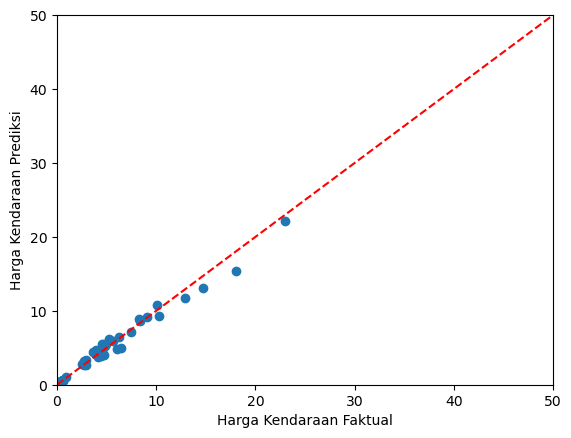

In [31]:
#Scatter plot data faktual dan data prediksi
plt.scatter(y_test, y_pred_test_xgb)
plt.plot([0, 100], [0,100], "--r")

plt.xlabel("Harga Kendaraan Faktual")
plt.ylabel("Harga Kendaraan Prediksi")
plt.xlim(0, 50)
plt.ylim(0, 50)
#plt.savefig("predict.png")
plt.show()

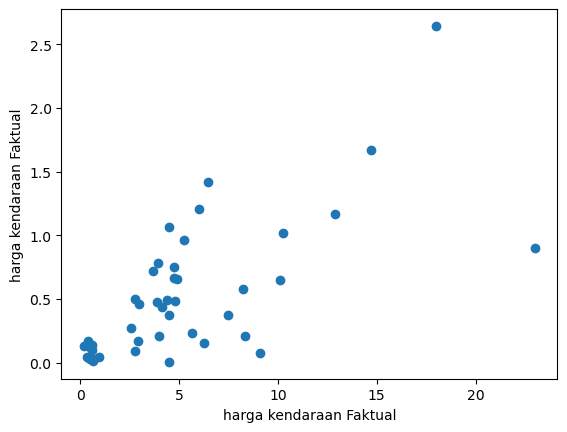

In [33]:
#Melihat deviasi data daya saing
selling_price_deviation = np.abs(y_test - y_pred_test_xgb)

plt.scatter(y_test, selling_price_deviation)
plt.xlabel("harga kendaraan Faktual")
plt.ylabel("harga kendaraan Faktual")
#plt.savefig("deviasi.png")
plt.show()

## Cara Load Model

In [ ]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"''"